## Exploratory Data Analysis of Kaggle competition House Prices: Advanced Regression Techniques

[Competition page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques#tutorials)

[Original kernel](https://www.kaggle.com/dgawlik/house-prices-eda)

In [3]:
# Import needed packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20
sns.set()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# A. Exploratory Data Analysis

In [44]:
# Load train and test.csv

train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [3]:
train.head()
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [38]:
# Select quantitative and qualitative 

quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [39]:
print("Number of quantitative features:", len(quantitative))
print("Number of qualitative features:", len(qualitative))

Number of quantitative features: 36
Number of qualitative features: 43


In [40]:
quantitative
qualitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [7]:
# Explore datasets' sizes
print("# of samples in training set:", len(train))
print("# of samples in test set:", len(test))

# of samples in training set: 1460
# of samples in test set: 1459


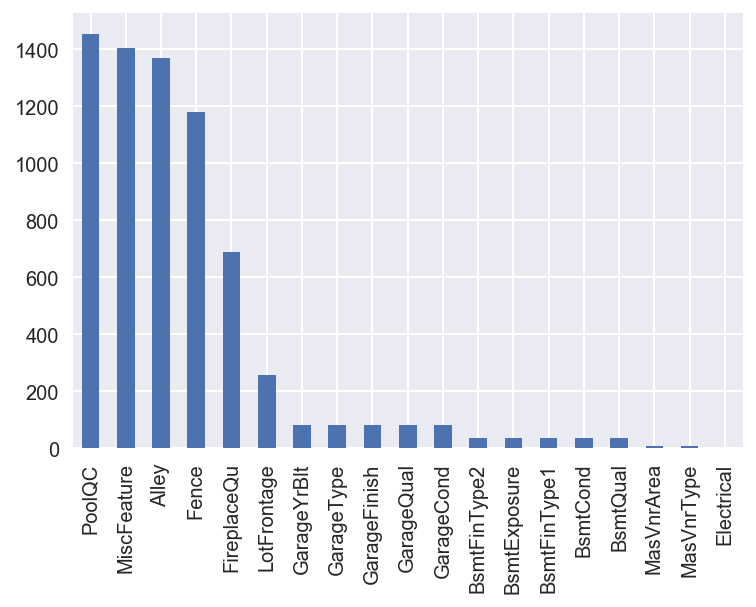

In [8]:
# Explore features with missing values
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending=False)
missing.plot.bar()

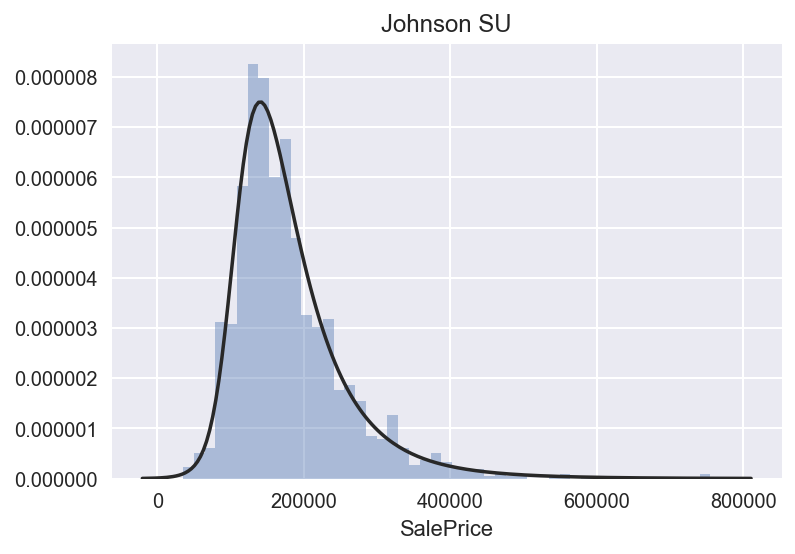

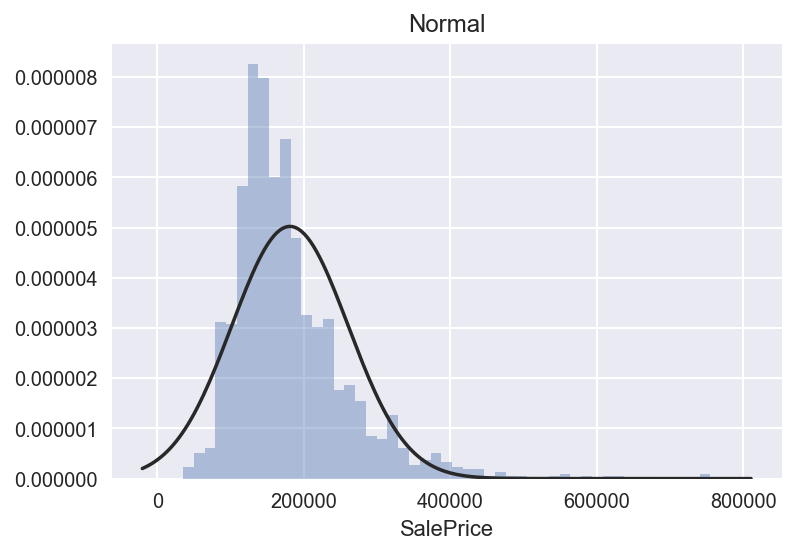

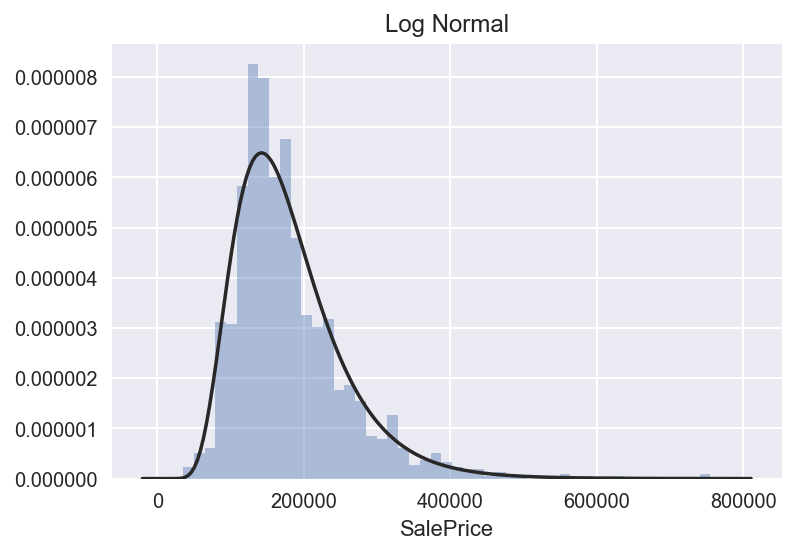

In [9]:
# Explore distribution of the target, SalePrice
import scipy.stats as st
y = train['SalePrice']
plt.figure(1)
plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

It appears that Johnson Su provides the best fit for the SalePrice

## Qualitative Features

In [10]:
# Test the quantitative variables for normality, using Shapiro Wilk, with alpha=0.01
# https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train[quantitative])
normal = normal.apply(test_normality)

# True = reject null hypothesis (i.e., NOT normally distributed)
print(normal)

MSSubClass       True
LotFrontage      True
LotArea          True
OverallQual      True
OverallCond      True
YearBuilt        True
YearRemodAdd     True
MasVnrArea       True
BsmtFinSF1       True
BsmtFinSF2       True
BsmtUnfSF        True
TotalBsmtSF      True
1stFlrSF         True
2ndFlrSF         True
LowQualFinSF     True
GrLivArea        True
BsmtFullBath     True
BsmtHalfBath     True
FullBath         True
HalfBath         True
BedroomAbvGr     True
KitchenAbvGr     True
TotRmsAbvGrd     True
Fireplaces       True
GarageYrBlt      True
GarageCars       True
GarageArea       True
WoodDeckSF       True
OpenPorchSF      True
EnclosedPorch    True
3SsnPorch        True
ScreenPorch      True
PoolArea         True
MiscVal          True
MoSold           True
YrSold           True
dtype: bool


Also none of quantitative variables has normal distribution so these should be transformed as well.

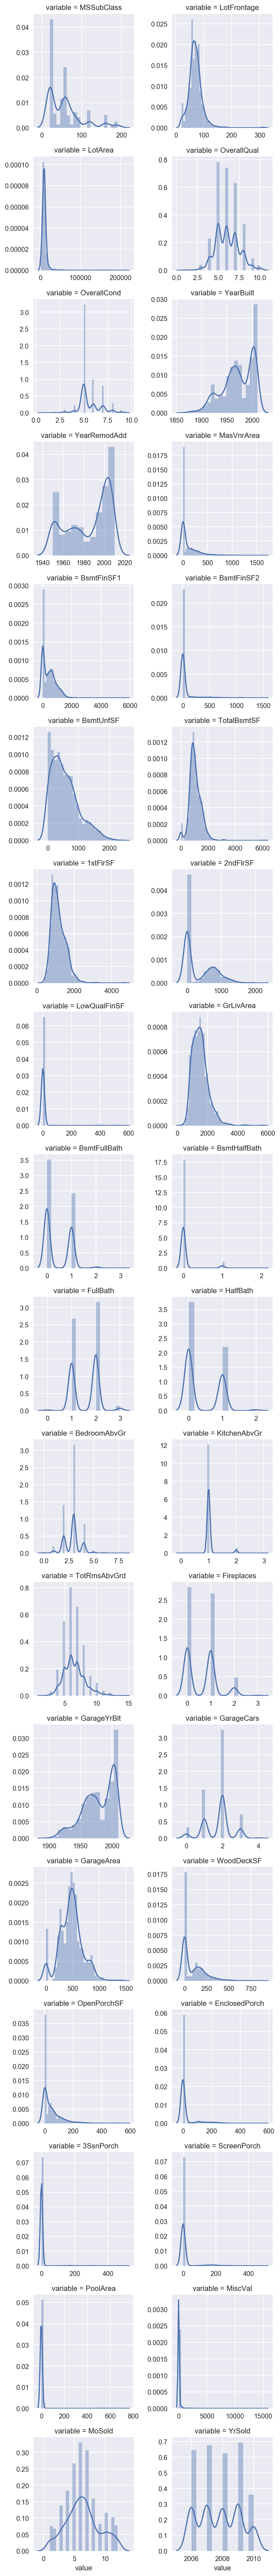

In [11]:
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Good candidates for log transformation
* LotFrontage
* LotArea
* TotalBsmtSF

## Categorical variables

/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pand

/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pand

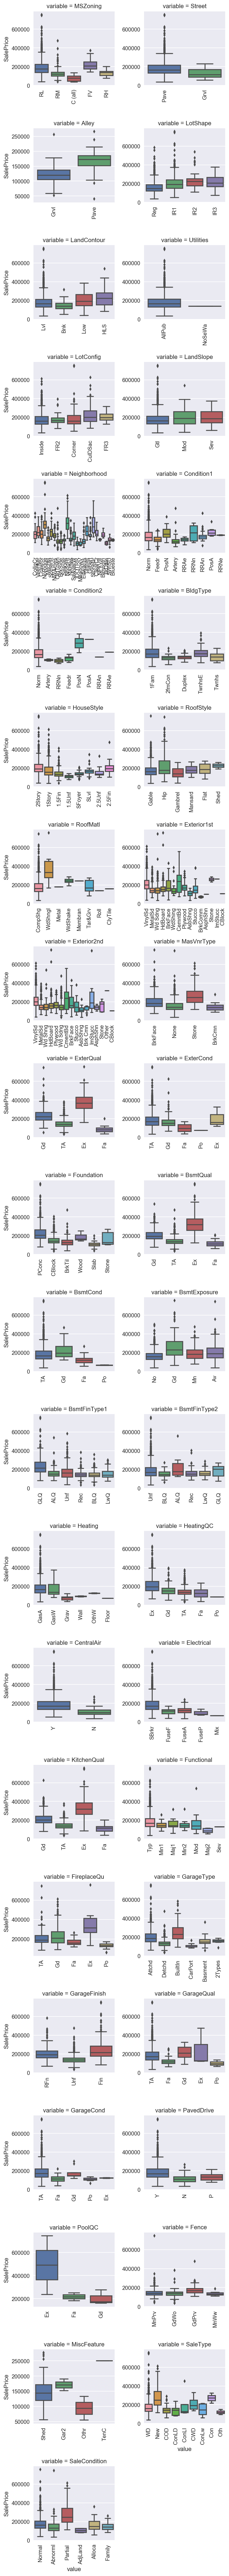

In [12]:
# Convert categorical features to dtype `categry` and fill missing
for c in qualitative:
    train[c] = train[c].astype('category')
    
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False)
g.map(boxplot, "value", "SalePrice")

(Below) For each variable SalePrices are partitioned to distinct sets based on category values. Then check with ANOVA test if sets have similar distributions. If variable has minor impact then set means should be equal. Decreasing pval is sign of increasing diversity in partitions.

/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/scipy/stats/stats.py:2958: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


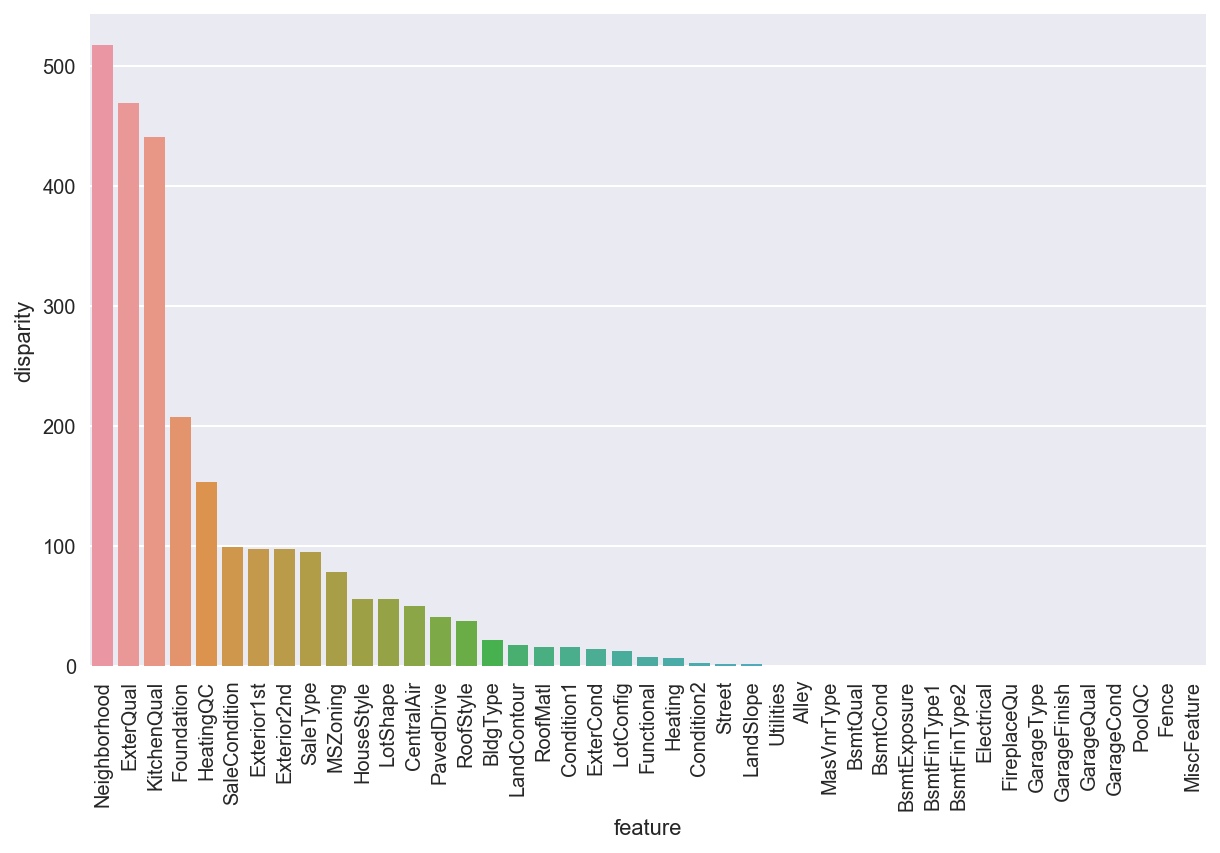

In [13]:
# Apply one-way ANOVA. For each feature, null hypothesis = no difference between mean SalePrice
# for each level
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(figsize=(10, 6))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [14]:
# Encode categorical variables. For each categorical variable, order each level based on the mean SalePrice, 
# from lowest to highest. Then encode each level from 1 to N, and store the encoding in `feature`_E
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


In [15]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities       ...        GarageType_E GarageFinish_E  \
0         Lvl    AllPub       ...                 5.0            2.0   
1         Lvl    AllPub       ...                 5.0            2.0   
2         Lvl    AllPub       ...                 5.0            2.0   
3         Lvl    AllPub       ...                 2.0            1.0   
4         Lvl    AllPub       ...                 5.0            2.0   

  GarageQual_E GarageCond_E PavedDrive_E PoolQC_E Fence_E  MiscFeature_E  \
0          3.0          5.0          3.0      NaN     NaN            NaN   
1          3.0          5.0          3.0      NaN     NaN            NaN   
2          3.0          5.0          3.0      NaN     NaN            NaN   
3          3.0          5.0          3.0      NaN     NaN            NaN   
4          3.0          5.0          3.0      NaN     NaN            NaN   

   SaleType_E  SaleCondition_E  
0         5.0              5.0  
1         5.0              5.0  
2         5.0              5.0  
3         5.0              2.0  
4         5.0              5.0  

[5 rows x 124 columns]

## Correlations
Generally to reduce confunding only variables uncorrelated with each other should be added to regression models (which are correlated with SalePrice).

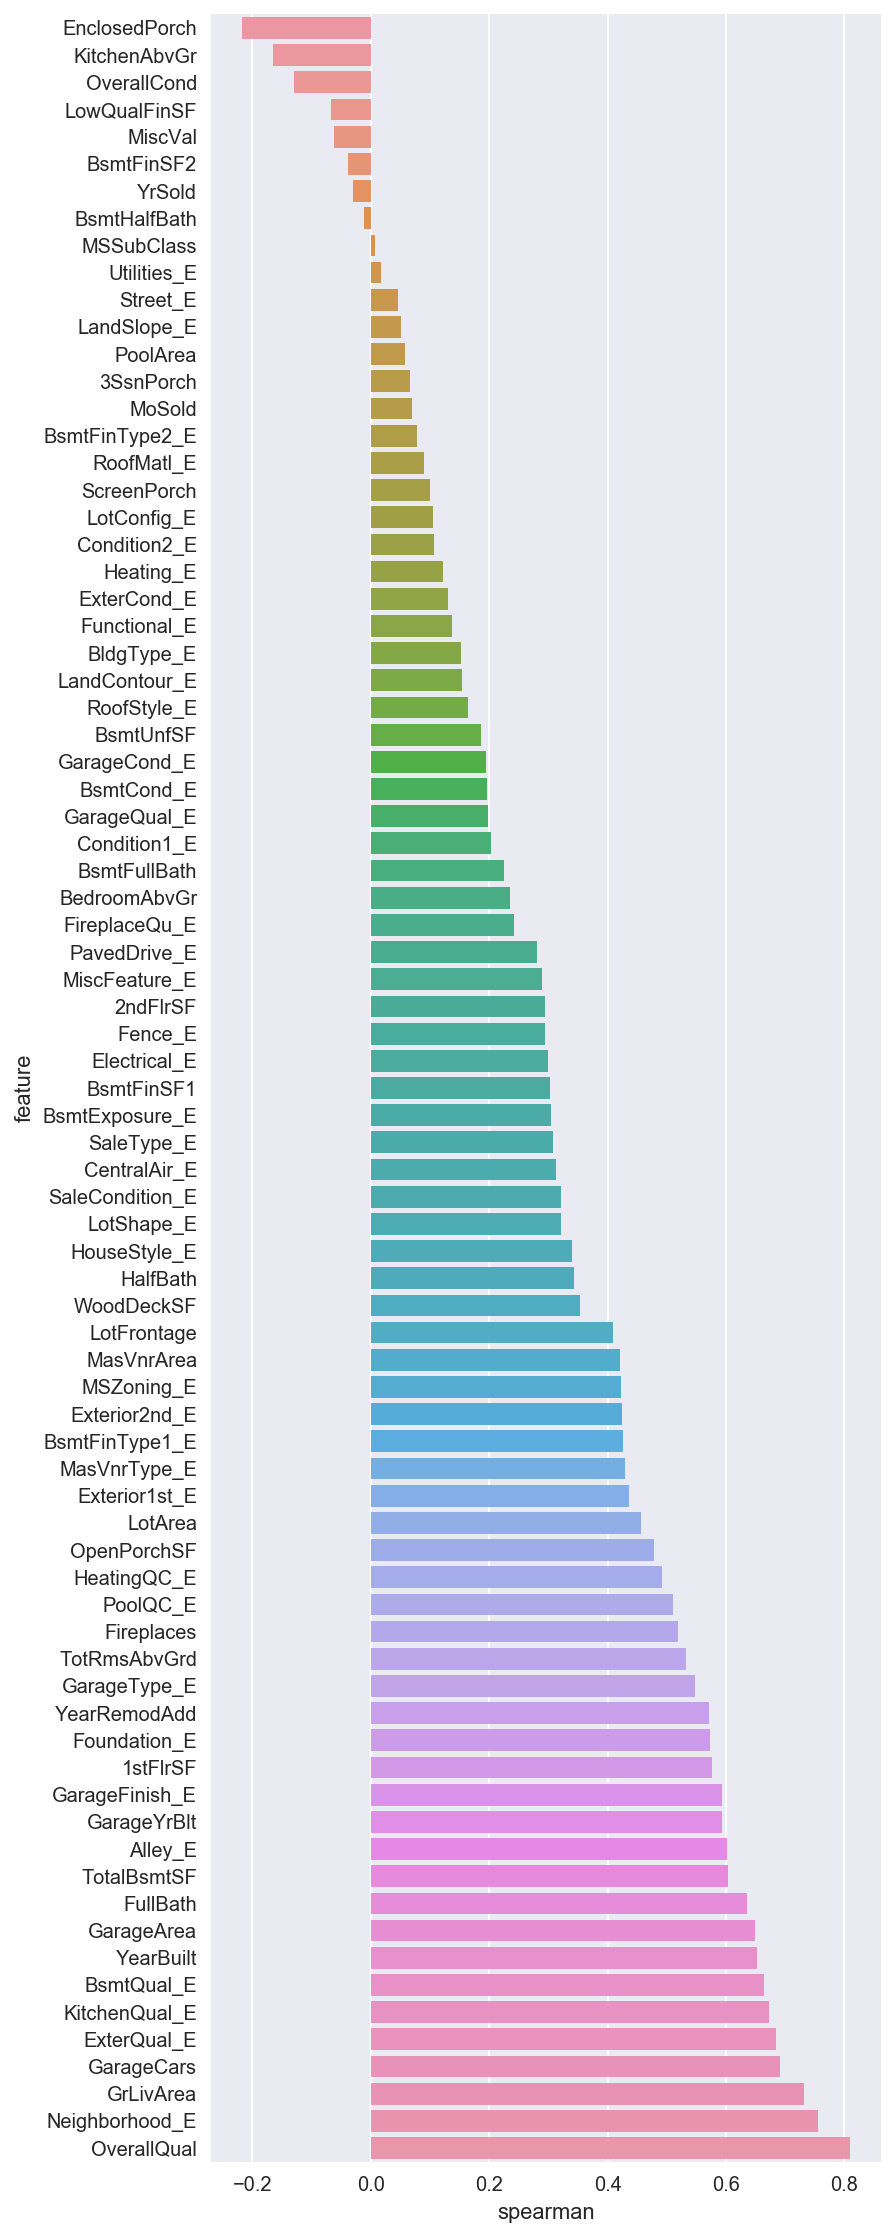

In [16]:
# Calculate the Spearman correlation between SalePrice and each variable
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [
        frame[f].corr(frame['SalePrice'], 'spearman') for f in features
    ]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25 * len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')


features = quantitative + qual_encoded
spearman(train, features)

OverallQal and Neighborhood (encoded) have the strongest positive correlation with SalePrice

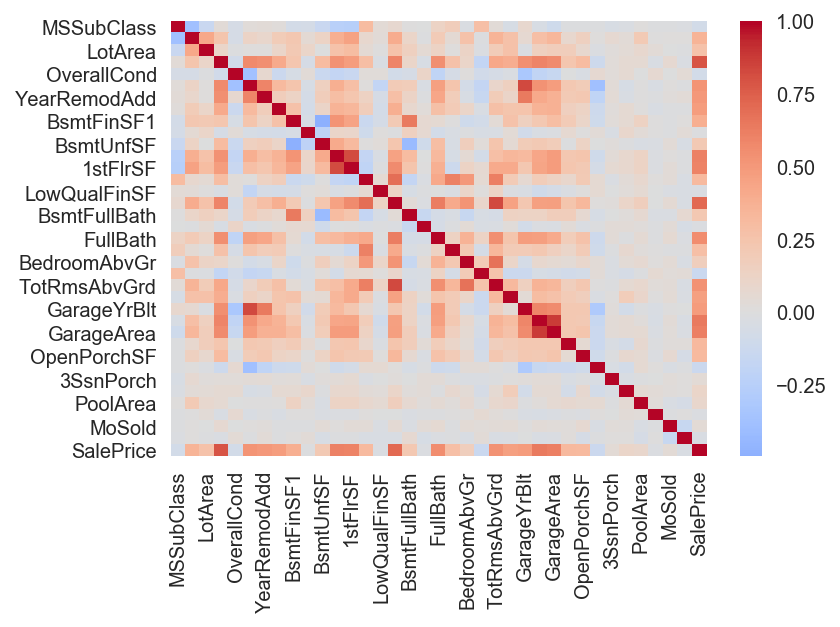

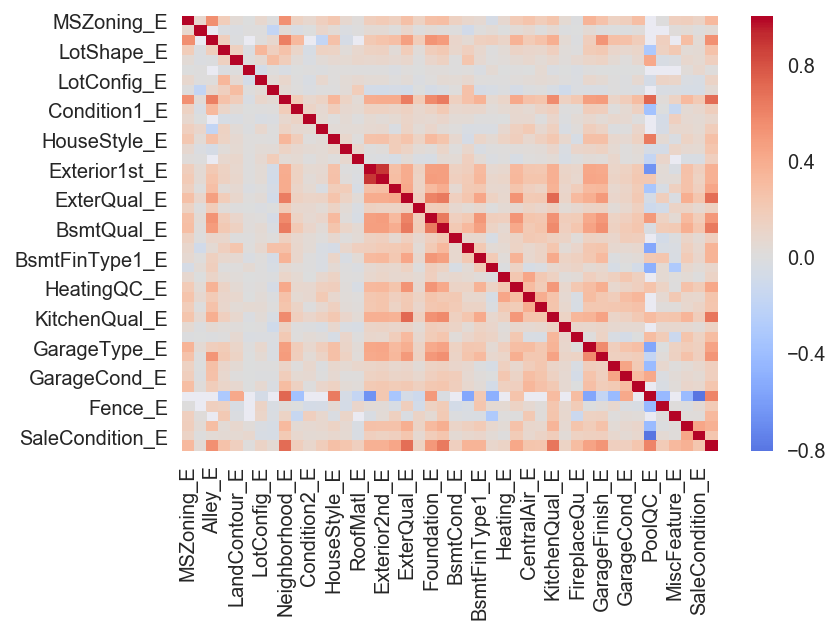

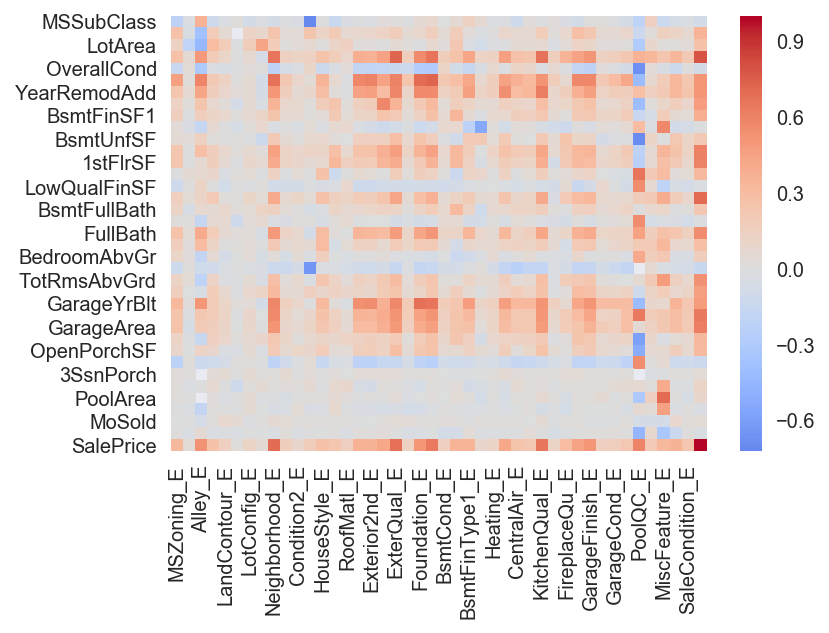

In [17]:

# Correlation between quantitative variables
plt.figure(1)
corr = train[quantitative + ['SalePrice']].corr()
sns.heatmap(corr, center=0., cmap="coolwarm")

# Correlation between qualitative variables
plt.figure(2)
corr = train[qual_encoded + ['SalePrice']].corr()
sns.heatmap(corr, center=0., cmap="coolwarm")

# Correlation between quantitative and qualitative variables

plt.figure(3)
corr = pd.DataFrame(
    np.zeros([len(quantitative) + 1,
               len(qualitative) + 1]),
    index=quantitative + ['SalePrice'],
    columns=qual_encoded + ['SalePrice'])
for q1 in quantitative + ['SalePrice']:
    for q2 in qual_encoded + ['SalePrice']:
        corr.loc[q1, q2] = train[q1].corr(train[q2])
sns.heatmap(corr, center=0., cmap="coolwarm")

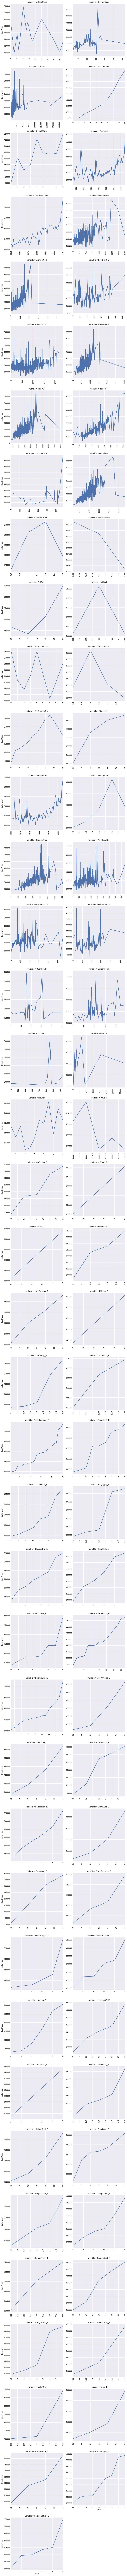

In [18]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time':x, 'val':y})
    ts=ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative+qual_encoded)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "SalePrice")

## Clustering

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

0.754861813003


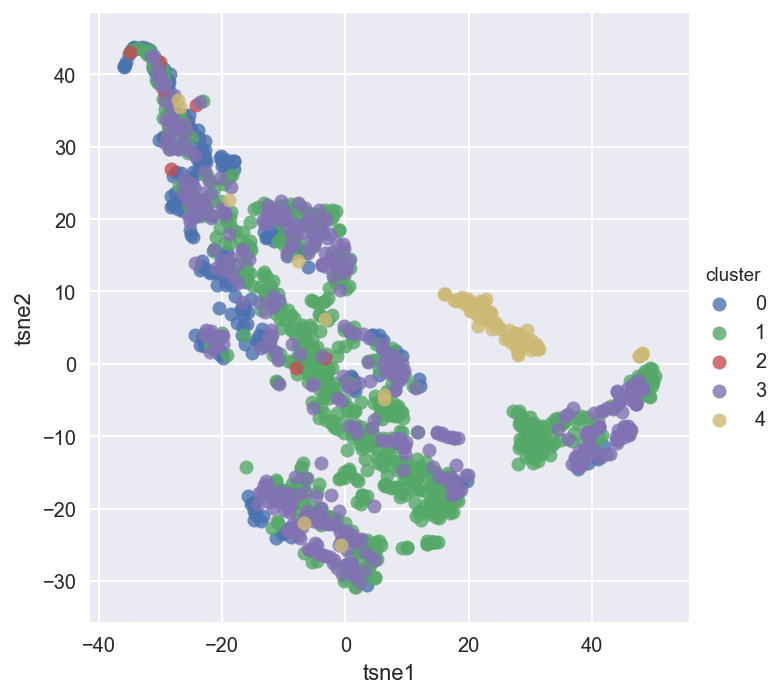

In [19]:
features = quantitative + qual_encoded
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = train[features].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

# B. Feature Engineering

In [4]:
# Reload train.csv and test.csv
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [3]:
# Step 1. Handle missing values for features
missing = train.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]

In [4]:
missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [5]:
def fill_missing_inplace(df_in):

    df = df_in.copy()

    # PoolQC: NA = No Pool
    df['PoolQC'].fillna('No', inplace=True)

    # MiscFeature: NA = None
    df['MiscFeature'].fillna('No', inplace=True)

    # Alley: NA = No alley access
    df['Alley'].fillna('No', inplace=True)

    # Fence: NA = No fence
    df['Fence'].fillna('No', inplace=True)

    # FireplaceQu: NA = No fireplace
    df['FireplaceQu'].fillna('No', inplace=True)

    # LotFrontage: NA = 0
    df['LotFrontage'].fillna(0, inplace=True)

    # GarageYrBlt, GarageType, GarageFinish,GarageQual,GarageCond: NA = None
    df['GarageType'].fillna('No', inplace=True)
    df['GarageFinish'].fillna('No', inplace=True)
    df['GarageQual'].fillna('No', inplace=True)
    df['GarageCond'].fillna('No', inplace=True)
    df['GarageYrBlt'].fillna(0, inplace=True)

    # BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual: NA = No Basement
    df['BsmtExposure'].fillna('No', inplace=True)
    df['BsmtFinType2'].fillna('No', inplace=True)
    df['BsmtFinType1'].fillna('No', inplace=True)
    df['BsmtCond'].fillna('No', inplace=True)
    df['BsmtQual'].fillna('No', inplace=True)

    # MasVnrArea, MasVnrType: NA = 0, None
    df['MasVnrArea'].fillna(0, inplace=True)
    df['MasVnrType'].fillna('None', inplace=True)

    # Electrical: Fill with the most common value
    df['Electrical'].fillna(
        df['Electrical'].value_counts().index[0], inplace=True)

    return df

In [6]:
train = fill_missing_inplace(train)

In [7]:
# Step 2: Replace numerical features that are actually really categories
train = train.replace({
    "MSSubClass": {
        20: "SC20",
        30: "SC30",
        40: "SC40",
        45: "SC45",
        50: "SC50",
        60: "SC60",
        70: "SC70",
        75: "SC75",
        80: "SC80",
        85: "SC85",
        90: "SC90",
        120: "SC120",
        150: "SC150",
        160: "SC160",
        180: "SC180",
        190: "SC190"
    },
    "MoSold": {
        1: "Jan",
        2: "Feb",
        3: "Mar",
        4: "Apr",
        5: "May",
        6: "Jun",
        7: "Jul",
        8: "Aug",
        9: "Sep",
        10: "Oct",
        11: "Nov",
        12: "Dec"
    }
})

In [8]:
# Select numeric and categorical features
numerical_features = [f for f in train.columns if train.dtypes[f] != 'object']
numerical_features.remove('SalePrice')
numerical_features.remove('Id')
categorical_features = [f for f in train.columns if train.dtypes[f] == 'object']

In [9]:
numerical_features
categorical_features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold']

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [12]:
# Step 3: Encode Qualitative features based on level ordering
# Encode categorical variables. For each categorical variable, order each level based on the mean SalePrice,
# from lowest to highest. Then encode each level from 1 to N, and store the encoding in `feature`_E
def encode_feature(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice'
                                ]].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(0, ordering.shape[0])
    ordering = ordering['ordering'].to_dict()

    return ordering

def encode_df(df, features_to_encode):

    new_col_names = []
    ordering_pairs = []
    for feature in features_to_encode:
        ordering = encode_feature(df, feature)
        for cat, o in ordering.items():
            df.loc[df[feature] == cat, feature + '_E'] = o
        ordering_pairs.append((feature, ordering))
        new_col_names.append(feature + '_E')

    # Drop the original features after encoding
    return df.drop(features_to_encode, axis=1), ordering_pairs, new_col_names

In [13]:
train, ordering_pairs, categorical_features = encode_df(train,categorical_features)

In [14]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice          1.000
OverallQual        0.791
GrLivArea          0.709
Neighborhood_E     0.697
ExterQual_E        0.683
KitchenQual_E      0.660
GarageCars         0.640
GarageArea         0.623
BsmtQual_E         0.623
TotalBsmtSF        0.614
1stFlrSF           0.606
FullBath           0.561
GarageFinish_E     0.549
TotRmsAbvGrd       0.534
FireplaceQu_E      0.526
YearBuilt          0.523
YearRemodAdd       0.507
Foundation_E       0.506
GarageType_E       0.489
MSSubClass_E       0.477
MasVnrArea         0.473
Fireplaces         0.467
HeatingQC_E        0.428
MasVnrType_E       0.424
BsmtFinSF1         0.386
BsmtFinType1_E     0.381
Exterior1st_E      0.371
SaleType_E         0.367
Exterior2nd_E      0.365
BsmtExposure_E     0.362
MSZoning_E         0.325
WoodDeckSF         0.324
2ndFlrSF           0.319
OpenPorchSF        0.316
HalfBath           0.284
GarageCond_E       0.282
GarageQual_E       0.279
HouseStyle_E       0.273
Lo

In [15]:
# Step 4. Generate new features
# 3* Polynomials on the top 10 existing numeric features

# Select the top 10 features based on correlation with SalePrice
i = 0
features_to_expand = []
for feature, _ in corr.SalePrice[1:].iteritems():    
    if i >= 10:
        break
    if "_E" not in feature:
        features_to_expand.append(feature)
        i += 1


In [16]:
def generate_new_features(df_in, features_to_expand):
    df = df_in.copy()
    for feature in features_to_expand:
        df[feature + 'Sqrt'] = np.sqrt(df[feature])
        df[feature + '-2'] = df[feature]**2
        df[feature + '-3'] = df[feature]**3
    return df

In [17]:
train = generate_new_features(train, features_to_expand)

In [18]:
# Update numeric_features and categorical_features

numerical_features = [f for f in train.columns if f not in categorical_features]
numerical_features.remove("Id")
numerical_features.remove("SalePrice")
print("Numerical features:", len(numerical_features))
print("Categorical features:", len(categorical_features))

Numerical features: 64
Categorical features: 45


In [19]:
numerical_features
categorical_features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'OverallQualSqrt',
 'OverallQual-2',
 'OverallQual-3',
 'GrLivAreaSqrt',
 'GrLivArea-2',
 'GrLivArea-3',
 'GarageCarsSqrt',
 'GarageCars-2',
 'GarageCars-3',
 'GarageAreaSqrt',
 'GarageArea-2',
 'GarageArea-3',
 'TotalBsmtSFSqrt',
 'TotalBsmtSF-2',
 'TotalBsmtSF-3',
 '1stFlrSFSqrt',
 '1stFlrSF-2',
 '1stFlrSF-3',
 'FullBathSqrt',
 'FullBath-2',
 'FullBath-3',
 'TotRmsAbvGrdSqrt',
 'TotRmsAbvGrd-2',
 'TotRmsAbvGrd-3',
 'YearBuiltSqrt',
 'YearBuilt-2',
 'YearBuilt-3',
 'YearRemodAddSqrt'

['MSSubClass_E',
 'MSZoning_E',
 'Street_E',
 'Alley_E',
 'LotShape_E',
 'LandContour_E',
 'Utilities_E',
 'LotConfig_E',
 'LandSlope_E',
 'Neighborhood_E',
 'Condition1_E',
 'Condition2_E',
 'BldgType_E',
 'HouseStyle_E',
 'RoofStyle_E',
 'RoofMatl_E',
 'Exterior1st_E',
 'Exterior2nd_E',
 'MasVnrType_E',
 'ExterQual_E',
 'ExterCond_E',
 'Foundation_E',
 'BsmtQual_E',
 'BsmtCond_E',
 'BsmtExposure_E',
 'BsmtFinType1_E',
 'BsmtFinType2_E',
 'Heating_E',
 'HeatingQC_E',
 'CentralAir_E',
 'Electrical_E',
 'KitchenQual_E',
 'Functional_E',
 'FireplaceQu_E',
 'GarageType_E',
 'GarageFinish_E',
 'GarageQual_E',
 'GarageCond_E',
 'PavedDrive_E',
 'PoolQC_E',
 'Fence_E',
 'MiscFeature_E',
 'MoSold_E',
 'SaleType_E',
 'SaleCondition_E']

In [20]:
train_num = train[numerical_features]
train_cat = train[categorical_features]
train_num.shape
train_cat.shape

(1460, 64)

(1460, 45)

In [21]:
train_num.describe()

LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  \
count     1460.000   1460.000     1460.000     1460.000   1460.000   
mean        57.623  10516.828        6.099        5.575   1971.268   
std         34.664   9981.265        1.383        1.113     30.203   
min          0.000   1300.000        1.000        1.000   1872.000   
25%         42.000   7553.500        5.000        5.000   1954.000   
50%         63.000   9478.500        6.000        5.000   1973.000   
75%         79.000  11601.500        7.000        6.000   2000.000   
max        313.000 215245.000       10.000        9.000   2010.000   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count      1460.000    1460.000    1460.000    1460.000   1460.000   
mean       1984.866     103.117     443.640      46.549    567.240   
std          20.645     180.731     456.098     161.319    441.867   
min        1950.000       0.000       0.000       0.000      0.000   
25%        1967.000       0.000       0.000       0.000    223.000   
50%        1994.000       0.000     383.500       0.000    477.500   
75%        2004.000     164.250     712.250       0.000    808.000   
max        2010.000    1600.000    5644.000    1474.000   2336.000   

            ...        FullBath-3  TotRmsAbvGrdSqrt  TotRmsAbvGrd-2  \
count       ...          1460.000          1460.000        1460.000   
mean        ...             5.264             2.534          45.122   
std         ...             4.785             0.314          23.336   
min         ...             0.000             1.414           4.000   
25%         ...             1.000             2.236          25.000   
50%         ...             8.000             2.449          36.000   
75%         ...             8.000             2.646          49.000   
max         ...            27.000             3.742         196.000   

       TotRmsAbvGrd-3  YearBuiltSqrt  YearBuilt-2    YearBuilt-3  \
count        1460.000       1460.000     1460.000       1460.000   
mean          331.410         44.398  3886808.362 7665517312.718   
std           274.525          0.341   118521.330  348910103.818   
min             8.000         43.267  3504384.000 6560206848.000   
25%           125.000         44.204  3818116.000 7460598664.000   
50%           216.000         44.418  3892729.000 7680354317.000   
75%           343.000         44.721  4000000.000 8000000000.000   
max          2744.000         44.833  4040100.000 8120601000.000   

       YearRemodAddSqrt  YearRemodAdd-2  YearRemodAdd-3  
count          1460.000        1460.000        1460.000  
mean             44.551     3940118.000  7822291731.473  
std               0.232       81742.909   242754777.950  
min              44.159     3802500.000  7414875000.000  
25%              44.351     3869089.000  7610498063.000  
50%              44.654     3976036.000  7928215784.000  
75%              44.766     4016016.000  8048096064.000  
max              44.833     4040100.000  8120601000.000  

[8 rows x 64 columns]

In [22]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
from scipy.stats import skew
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index

train_num.loc[:, skewed_features] = np.log1p(train_num.loc[:, skewed_features])

53 skewed numerical features to log transform


/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
skewed_features

Index(['LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'OverallQual-2', 'OverallQual-3',
       'GrLivAreaSqrt', 'GrLivArea-2', 'GrLivArea-3', 'GarageCarsSqrt',
       'GarageCars-2', 'GarageCars-3', 'GarageAreaSqrt', 'GarageArea-2',
       'GarageArea-3', 'TotalBsmtSFSqrt', 'TotalBsmtSF-2', 'TotalBsmtSF-3',
       '1stFlrSFSqrt', '1stFlrSF-2', '1stFlrSF-3', 'FullBathSqrt',
       'FullBath-2', 'FullBath-3', 'TotRmsAbvGrd-2', 'TotRmsAbvGrd-3',
       'YearBuiltSqrt', 'YearBuilt-2', 'YearBuilt-3', 'YearRemodAddSqrt'],
      dtype='object')

In [24]:
train_num['PoolArea'].describe()

count   1460.000
mean       0.030
std        0.439
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        6.605
Name: PoolArea, dtype: float64

In [25]:
# Get dummies for train_cat
print("Remaining NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
train_cat_dummies = pd.get_dummies(train_cat, columns=categorical_features)
print("Remaining NAs for categorical features in train : " + str(train_cat_dummies.isnull().values.sum()))


Remaining NAs for categorical features in train : 0
Remaining NAs for categorical features in train : 0


In [361]:
train_cat_dummies.shape

(1460, 292)

## Modeling

In [5]:
# Import sklearn
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [27]:
# Prepare data for sklearn

# Join categorical and numerical features
X = pd.concat([train_num, train_cat_dummies], axis = 1)
# Log Transform y
y = np.log(train['SalePrice'])
print("New number of features : " + str(X.shape[1]))

New number of features : 356


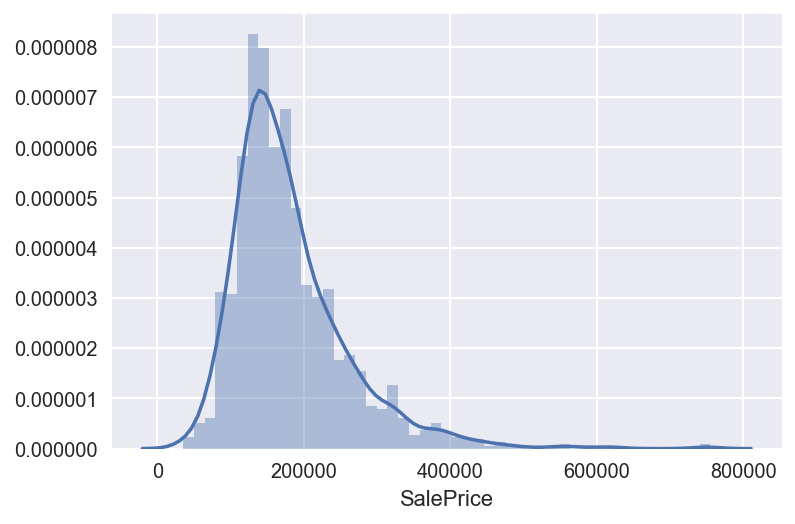

In [28]:
sns.distplot(train['SalePrice'])

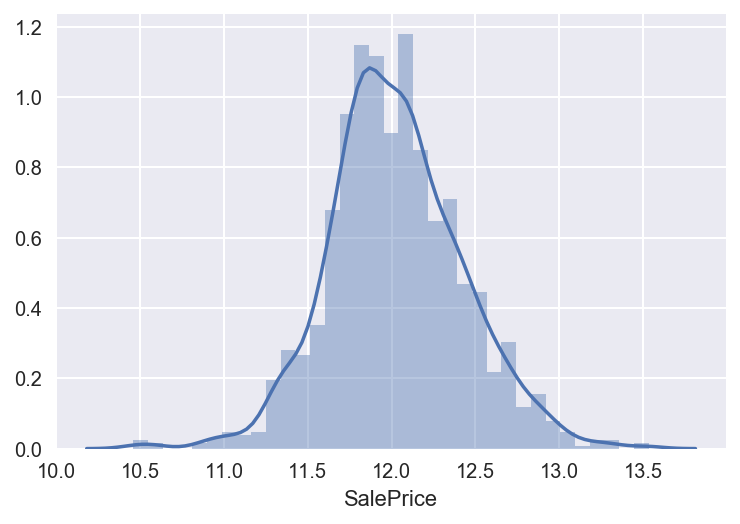

In [29]:
sns.distplot(y)

In [30]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1168, 356)
X_test : (292, 356)
y_train : (1168,)
y_test : (292,)


In [31]:
X_train.describe()
X_test.describe()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
count     1168.000 1168.000     1168.000     1168.000   1168.000   
mean        56.979    9.113        6.086        1.869      7.587   
std         33.933    0.518        1.367        0.170      0.015   
min          0.000    7.171        1.000        0.693      7.535   
25%         41.750    8.935        5.000        1.792      7.578   
50%         62.000    9.160        6.000        1.792      7.587   
75%         79.000    9.359        7.000        1.946      7.601   
max        313.000   12.280       10.000        2.303      7.606   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count      1168.000    1168.000    1168.000    1168.000   1168.000   
mean          7.594       2.084       4.203       0.666      5.663   
std           0.010       2.628       3.008       1.850      1.836   
min           7.576       0.000       0.000       0.000      0.000   
25%           7.584       0.000       0.000       0.000      5.434   
50%           7.598       0.000       5.941       0.000      6.181   
75%           7.603       5.119       6.575       0.000      6.700   
max           7.606       7.378       7.724       7.022      7.675   

              ...           SaleType_E_5.0  SaleType_E_6.0  SaleType_E_7.0  \
count         ...                 1168.000        1168.000        1168.000   
mean          ...                    0.003           0.001           0.001   
std           ...                    0.058           0.029           0.029   
min           ...                    0.000           0.000           0.000   
25%           ...                    0.000           0.000           0.000   
50%           ...                    0.000           0.000           0.000   
75%           ...                    0.000           0.000           0.000   
max           ...                    1.000           1.000           1.000   

       SaleType_E_8.0  SaleCondition_E_0.0  SaleCondition_E_1.0  \
count        1168.000             1168.000             1168.000   
mean            0.082                0.003                0.068   
std             0.275                0.051                0.251   
min             0.000                0.000                0.000   
25%             0.000                0.000                0.000   
50%             0.000                0.000                0.000   
75%             0.000                0.000                0.000   
max             1.000                1.000                1.000   

       SaleCondition_E_2.0  SaleCondition_E_3.0  SaleCondition_E_4.0  \
count             1168.000             1168.000             1168.000   
mean                 0.010                0.006                0.830   
std                  0.101                0.077                0.376   
min                  0.000                0.000                0.000   
25%                  0.000                0.000                1.000   
50%                  0.000                0.000                1.000   
75%                  0.000                0.000                1.000   
max                  1.000                1.000                1.000   

       SaleCondition_E_5.0  
count             1168.000  
mean                 0.084  
std                  0.277  
min                  0.000  
25%                  0.000  
50%                  0.000  
75%                  0.000  
max                  1.000  

[8 rows x 356 columns]

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
count      292.000  292.000      292.000      292.000    292.000   
mean        60.202    9.103        6.151        1.872      7.588   
std         37.398    0.514        1.445        0.163      0.015   
min          0.000    7.298        3.000        1.386      7.541   
25%         46.500    8.915        5.000        1.792      7.579   
50%         65.000    9.132        6.000        1.792      7.589   
75%         78.000    9.354        7.000        1.946      7.602   
max        313.000   11.065       10.000        2.303      7.606   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count       292.000     292.000     292.000     292.000    292.000   
mean          7.594       2.265       4.337       0.612      5.589   
std           0.010       2.632       2.930       1.827      1.927   
min           7.576       0.000       0.000       0.000      0.000   
25%           7.586       0.000       0.000       0.000      5.357   
50%           7.599       0.000       5.983       0.000      6.144   
75%           7.603       5.083       6.551       0.000      6.666   
max           7.606       6.939       8.639       7.296      7.757   

              ...           SaleType_E_5.0  SaleType_E_6.0  SaleType_E_7.0  \
count         ...                  292.000         292.000         292.000   
mean          ...                    0.003           0.010           0.003   
std           ...                    0.059           0.101           0.059   
min           ...                    0.000           0.000           0.000   
25%           ...                    0.000           0.000           0.000   
50%           ...                    0.000           0.000           0.000   
75%           ...                    0.000           0.000           0.000   
max           ...                    1.000           1.000           1.000   

       SaleType_E_8.0  SaleCondition_E_0.0  SaleCondition_E_1.0  \
count         292.000              292.000              292.000   
mean            0.089                0.003                0.075   
std             0.285                0.059                0.264   
min             0.000                0.000                0.000   
25%             0.000                0.000                0.000   
50%             0.000                0.000                0.000   
75%             0.000                0.000                0.000   
max             1.000                1.000                1.000   

       SaleCondition_E_2.0  SaleCondition_E_3.0  SaleCondition_E_4.0  \
count              292.000              292.000              292.000   
mean                 0.027                0.017                0.784   
std                  0.164                0.130                0.412   
min                  0.000                0.000                0.000   
25%                  0.000                0.000                1.000   
50%                  0.000                0.000                1.000   
75%                  0.000                0.000                1.000   
max                  1.000                1.000                1.000   

       SaleCondition_E_5.0  
count              292.000  
mean                 0.092  
std                  0.290  
min                  0.000  
25%                  0.000  
50%                  0.000  
75%                  0.000  
max                  1.000  

[8 rows x 356 columns]

In [32]:
# Standardize numerical features
stdSc = StandardScaler()
stdSc.fit(X_train.loc[:, numerical_features])
X_train.loc[:, numerical_features] = stdSc.transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])

StandardScaler(copy=True, with_mean=True, with_std=True)

/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
X_train[numerical_features].describe()
X_test[numerical_features].describe()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
count     1168.000 1168.000     1168.000     1168.000   1168.000   
mean         0.000    0.000       -0.000        0.000      0.000   
std          1.000    1.000        1.000        1.000      1.000   
min         -1.680   -3.749       -3.721       -6.927     -3.314   
25%         -0.449   -0.344       -0.795       -0.453     -0.556   
50%          0.148    0.092       -0.063       -0.453      0.044   
75%          0.649    0.475        0.668        0.455      0.954   
max          7.548    6.112        2.863        2.557      1.276   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count      1168.000    1168.000    1168.000    1168.000   1168.000   
mean         -0.000       0.000       0.000      -0.000     -0.000   
std           1.000       1.000       1.000       1.000      1.000   
min          -1.683      -0.793      -1.398      -0.360     -3.086   
25%          -0.901      -0.793      -1.398      -0.360     -0.125   
50%           0.405      -0.793       0.578      -0.360      0.282   
75%           0.932       1.156       0.789      -0.360      0.565   
max           1.218       2.016       1.171       3.437      1.096   

            ...        FullBath-3  TotRmsAbvGrdSqrt  TotRmsAbvGrd-2  \
count       ...          1168.000          1168.000        1168.000   
mean        ...            -0.000            -0.000          -0.000   
std         ...             1.000             1.000           1.000   
min         ...            -1.945            -3.578          -4.361   
25%         ...            -1.071            -0.963          -0.960   
50%         ...             0.827            -0.284          -0.233   
75%         ...             0.827             0.340           0.388   
max         ...             2.259             3.826           3.217   

       TotRmsAbvGrd-3  YearBuiltSqrt  YearBuilt-2  YearBuilt-3  \
count        1168.000       1168.000     1168.000     1168.000   
mean            0.000          0.000       -0.000        0.000   
std             1.000          1.000        1.000        1.000   
min            -4.501         -3.313       -3.314       -3.314   
25%            -0.957         -0.556       -0.556       -0.556   
50%            -0.227          0.044        0.044        0.044   
75%             0.391          0.954        0.954        0.954   
max             3.180          1.276        1.276        1.276   

       YearRemodAddSqrt  YearRemodAdd-2  YearRemodAdd-3  
count          1168.000        1168.000        1168.000  
mean              0.000          -0.000           0.000  
std               1.000           1.000           1.000  
min              -1.683          -1.673          -1.668  
25%              -0.901          -0.907          -0.911  
50%               0.405           0.398           0.395  
75%               0.932           0.936           0.937  
max               1.218           1.230           1.235  

[8 rows x 64 columns]

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
count      292.000  292.000      292.000      292.000    292.000   
mean         0.095   -0.019        0.047        0.017      0.062   
std          1.103    0.993        1.057        0.960      0.965   
min         -1.680   -3.502       -2.258       -2.842     -2.970   
25%         -0.309   -0.381       -0.795       -0.453     -0.523   
50%          0.236    0.037       -0.063       -0.453      0.175   
75%          0.620    0.465        0.668        0.455      0.986   
max          7.548    3.768        2.863        2.557      1.243   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count       292.000     292.000     292.000     292.000    292.000   
mean          0.042       0.069       0.044      -0.030     -0.040   
std           0.992       1.002       0.974       0.988      1.050   
min          -1.683      -0.793      -1.398      -0.360     -3.086   
25%          -0.767      -0.793      -1.398      -0.360     -0.167   
50%           0.477      -0.793       0.592      -0.360      0.262   
75%           0.932       1.142       0.781      -0.360      0.546   
max           1.171       1.848       1.475       3.585      1.141   

            ...        FullBath-3  TotRmsAbvGrdSqrt  TotRmsAbvGrd-2  \
count       ...           292.000           292.000         292.000   
mean        ...            -0.014            -0.084          -0.084   
std         ...             1.024             0.999           0.998   
min         ...            -1.945            -2.567          -2.931   
25%         ...            -1.071            -0.963          -0.960   
50%         ...             0.827            -0.284          -0.233   
75%         ...             0.827             0.340           0.388   
max         ...             2.259             2.943           2.585   

       TotRmsAbvGrd-3  YearBuiltSqrt  YearBuilt-2  YearBuilt-3  \
count         292.000        292.000      292.000      292.000   
mean           -0.084          0.062        0.062        0.062   
std             0.998          0.965        0.965        0.965   
min            -2.977         -2.970       -2.970       -2.970   
25%            -0.957         -0.523       -0.523       -0.523   
50%            -0.227          0.175        0.175        0.175   
75%             0.391          0.986        0.986        0.986   
max             2.560          1.244        1.243        1.243   

       YearRemodAddSqrt  YearRemodAdd-2  YearRemodAdd-3  
count           292.000         292.000         292.000  
mean              0.042           0.042           0.042  
std               0.992           0.992           0.992  
min              -1.683          -1.673          -1.668  
25%              -0.767          -0.775          -0.779  
50%               0.477           0.472           0.469  
75%               0.932           0.936           0.937  
max               1.171           1.181           1.186  

[8 rows x 64 columns]

In [57]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better=False)


def rmse_cv_train(model):
    rmse = np.sqrt(-cross_val_score(
        model, X_train, y_train, scoring=scorer, cv=10))
    return (rmse)


def rmse_cv_test(model):
    rmse = np.sqrt(-cross_val_score(
        model, X_test, y_test, scoring=scorer, cv=10))
    return (rmse)


def rmse(y_true, y_pred):

    return np.sqrt(mean_squared_error(y_true, y_pred))

**1. Linear Regression without regularization**

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

RMSE on Training set : 2795436.10901
RMSE on Test set : 355736342.337


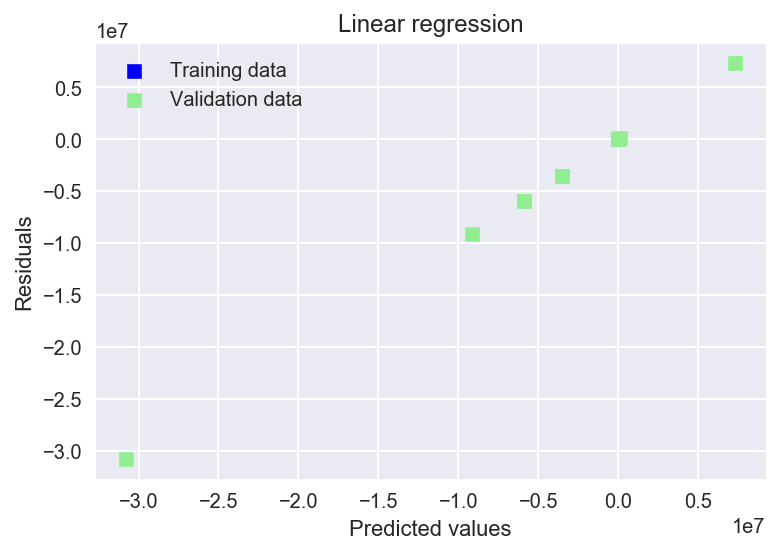

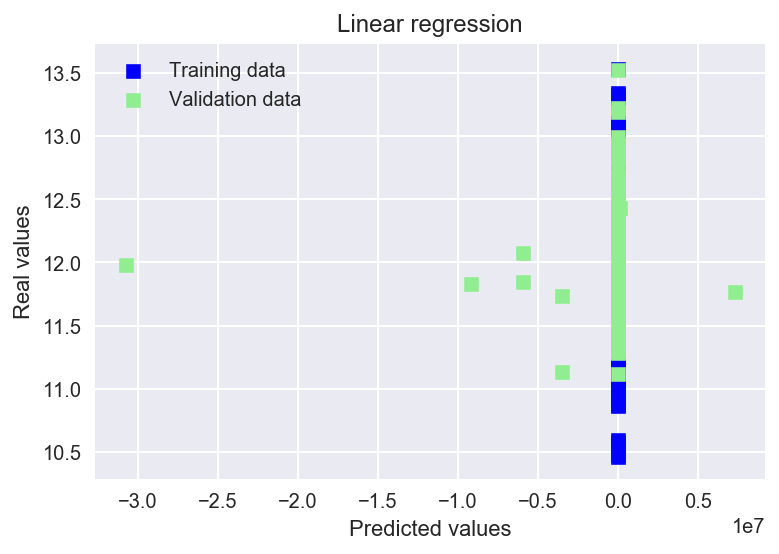

In [380]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()


In [382]:
from scipy import stats
stats.describe(y_train)
stats.describe(y_train_pred)
stats.describe(y_test)
stats.describe(y_test_pred)


DescribeResult(nobs=1168, minmax=(10.460242108190519, 13.534473028231162), mean=12.023355189946757, variance=0.16160160969673534, skewness=0.030198773638415027, kurtosis=0.833986602667284)

DescribeResult(nobs=1168, minmax=(10.521857663989067, 13.567933991551399), mean=12.023355414759214, variance=0.15508646289002231, skewness=0.09171118680258944, kurtosis=0.5284095062882437)

DescribeResult(nobs=292, minmax=(11.112447898373103, 13.521139497361697), mean=12.026833745759888, variance=0.15192011625661042, skewness=0.523430309330318, kurtosis=0.6327771186897886)

DescribeResult(nobs=292, minmax=(-30762297.325363666, 7308956.0079265833), mean=-175575.38151186259, variance=4015523725704.9512, skewness=-12.561853121178288, kurtosis=186.73805843000954)

LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1],
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=50000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

Best alpha : 0.0006
Try again for more precision with alphas centered around 0.0006


LassoCV(alphas=[0.00035999999999999997, 0.00038999999999999999, 0.00041999999999999996, 0.00044999999999999999, 0.00047999999999999996, 0.00050999999999999993, 0.00054000000000000001, 0.00056999999999999998, 0.00059999999999999995, 0.00062999999999999992, 0.00066, 0.00068999999999999986, 0.00074999999999999991, 0.00077999999999999999, 0.00080999999999999996, 0.00083999999999999993],
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=50000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

Best alpha : 0.00051
Lasso RMSE on Training set : 0.0986230596701
Lasso RMSE on Test set : 0.152100543517


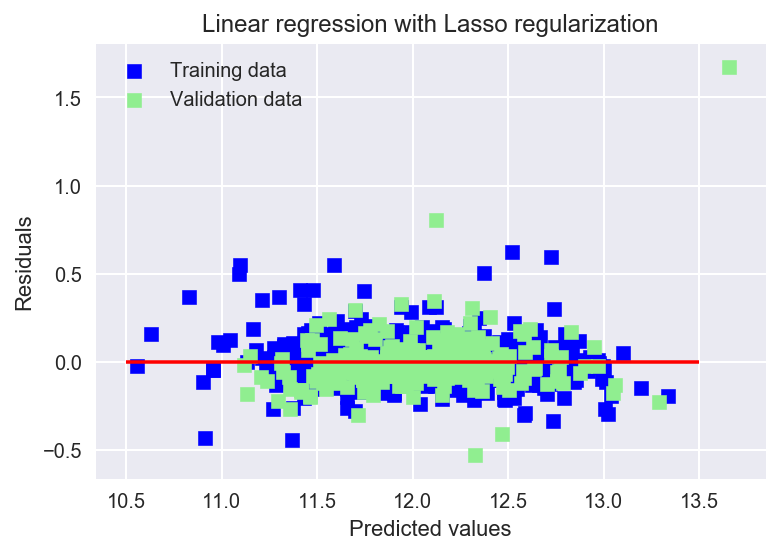

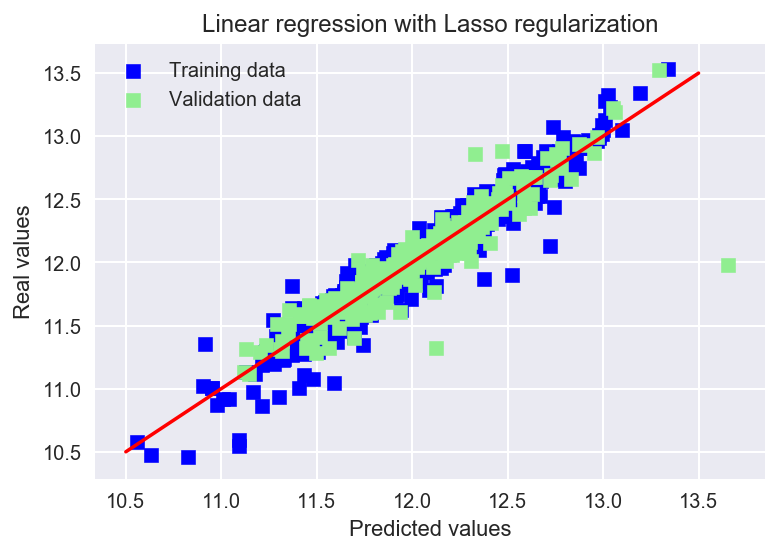

Lasso picked 125 features and eliminated the other 231 features


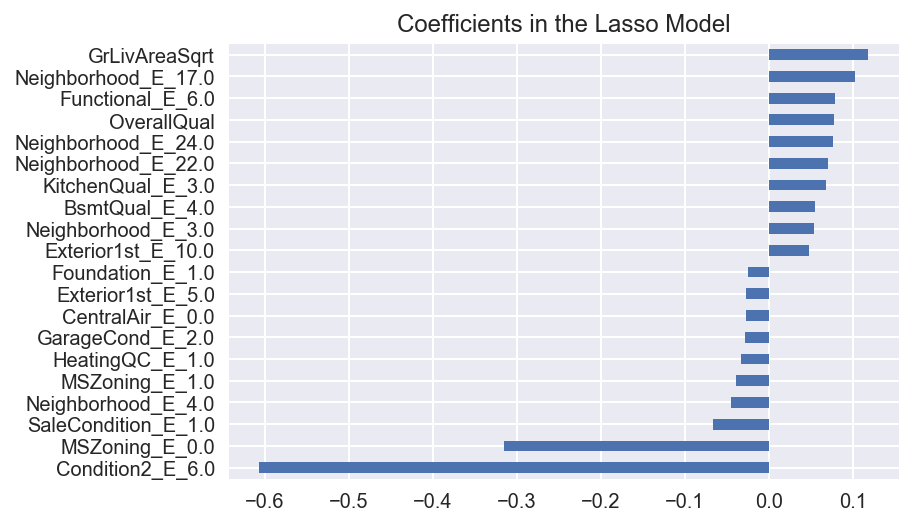

In [61]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

print("Lasso RMSE on Training set :", rmse(y_train, y_train_las))
print("Lasso RMSE on Test set :", rmse(y_test, y_test_las))

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RMSE on Training set : 0.0624145877896
RMSE on Test set : 0.147864056889


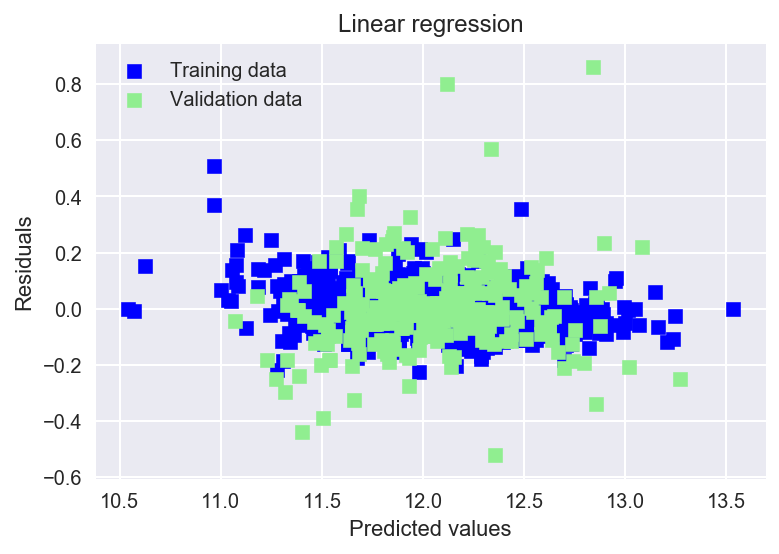

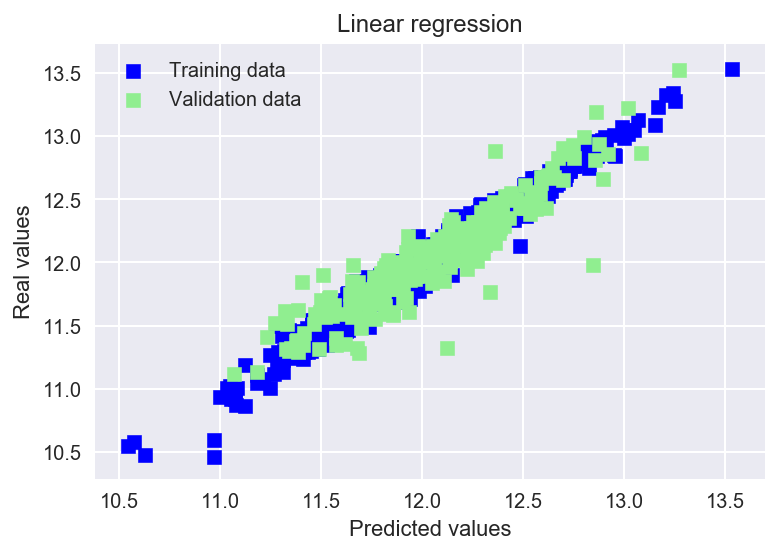

In [59]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor


clf = RandomForestRegressor()
clf.fit(X_train, y_train)

# Look at predictions on training and validation set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print("RMSE on Training set :", rmse(y_train, y_train_pred))
print("RMSE on Test set :", rmse(y_test, y_test_pred))

# Plot residuals
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c="blue",
    marker="s",
    label="Training data")
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c="lightgreen",
    marker="s",
    label="Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c="blue", marker="s", label="Training data")
plt.scatter(
    y_test_pred, y_test, c="lightgreen", marker="s", label="Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc="upper left")
plt.show()

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   33.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='rmse', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

0.8994401586479556
{'max_depth': 3, 'n_estimators': 200}
RMSE on Training set : 0.0627540652023
RMSE on Test set : 0.130339644299


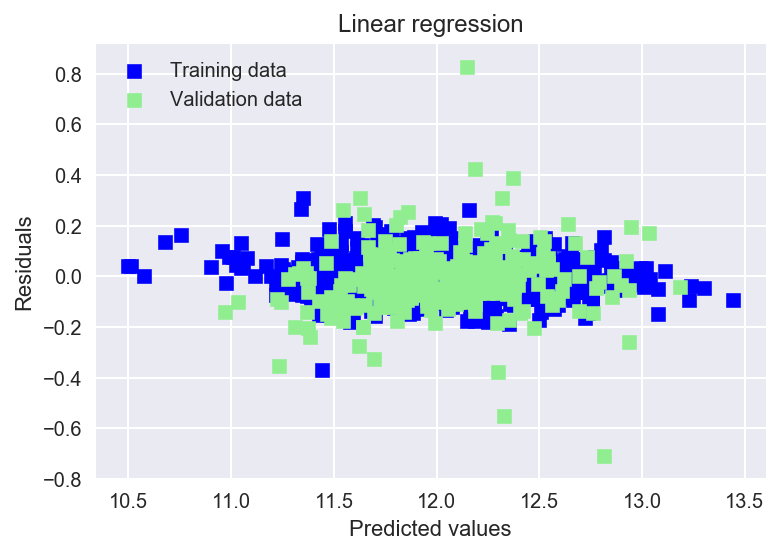

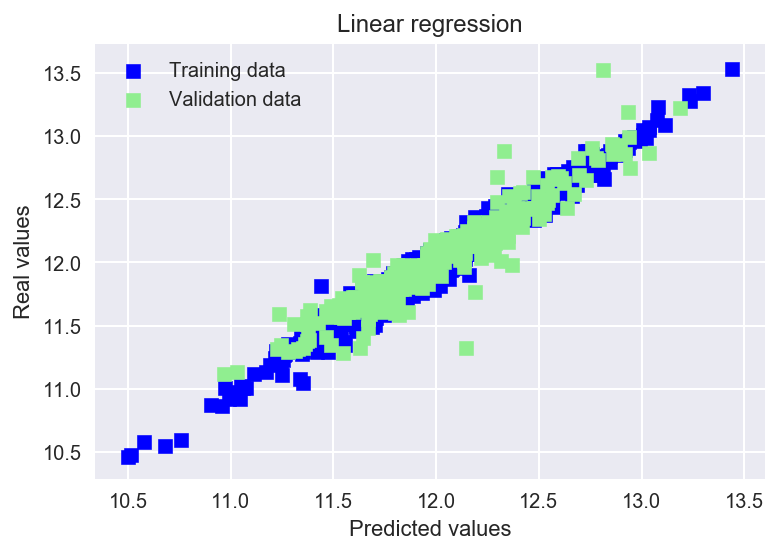

In [62]:
# XGboost
import xgboost as xgb

xgb_model = xgb.XGBRegressor(eval_metric='rmse')
clf = GridSearchCV(
    xgb_model, {'max_depth': [2, 3, 4, 5, 6],
                'n_estimators': [50, 100, 200]},
    verbose=1)

clf.fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse(y_train, y_train_pred))
print("RMSE on Test set :", rmse(y_test, y_test_pred))

# Plot residuals
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c="blue",
    marker="s",
    label="Training data")
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c="lightgreen",
    marker="s",
    label="Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c="blue", marker="s", label="Training data")
plt.scatter(
    y_test_pred, y_test, c="lightgreen", marker="s", label="Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc="upper left")
plt.show()

## Predict the test dataset

In [11]:
from scipy.stats import skew


class DataPreprocessor():
    """This class encapsulates the transformations that got applied to the dfing dataset. 
    It provides fit, transform, and fit_transform methods that can be used to prepare the test dataset for evaluation
    """

    def __init__(self):
        pass

    def fit(self, df):
        self._fit_transform(df)

    def fit_transform(self, df):
        return self._fit_transform(df)

    def transform(self, df):
        return self._fit_transform(df, transform_only=True)

    def _fit_transform(self, df, transform_only=False):

        df = df.copy()

        # Step 1: fill missing columns
        df = self.fill_missing_inplace(df)

        # Step 2: Replace numerical features that are actually really categories
        df.replace(
            {
                "MSSubClass": {
                    20: "SC20",
                    30: "SC30",
                    40: "SC40",
                    45: "SC45",
                    50: "SC50",
                    60: "SC60",
                    70: "SC70",
                    75: "SC75",
                    80: "SC80",
                    85: "SC85",
                    90: "SC90",
                    120: "SC120",
                    150: "SC150",
                    160: "SC160",
                    180: "SC180",
                    190: "SC190"
                },
                "MoSold": {
                    1: "Jan",
                    2: "Feb",
                    3: "Mar",
                    4: "Apr",
                    5: "May",
                    6: "Jun",
                    7: "Jul",
                    8: "Aug",
                    9: "Sep",
                    10: "Oct",
                    11: "Nov",
                    12: "Dec"
                }
            },
            inplace=True)

        # Step 3: Select numeric and categorical features
        if not transform_only:
            self.numerical_features, self.categorical_features = self.select_features(
                df)

        # Step 4: Encode categorical features based on level ordering

        # If fitting and transforming, then record the features encoded and the orderings
        if not transform_only:
            self.categorical_features_encoded = []
            self.categorical_features_orderings = dict()

        for feature in self.categorical_features:
            if not transform_only:
                self.categorical_features_orderings[feature] = self.encode_feature(
                    df, feature)
                self.categorical_features_encoded.append(feature + '_E')

            for cat, o in self.categorical_features_orderings[feature].items():
                df.loc[df[feature] == cat, feature + '_E'] = o
        # Drop the original features after encoding
        df.drop(self.categorical_features, axis=1)

        # Step 5:

        # 3* Polynomials on the top 10 existing numeric features

        if not transform_only:
            corr = df.corr()
            corr.sort_values(["SalePrice"], ascending=False, inplace=True)

            # Select the top 10 features based on correlation with SalePrice
            i = 0
            self.features_to_expand = []
            for feature, _ in corr.SalePrice[1:].iteritems():
                if i >= 10:
                    break
                if "_E" not in feature:
                    self.features_to_expand.append(feature)
                    i += 1

        for feature in self.features_to_expand:
            df[feature + 'Sqrt'] = np.sqrt(df[feature])
            df[feature + '-2'] = df[feature]**2
            df[feature + '-3'] = df[feature]**3
            
            if not transform_only:
                self.numerical_features.extend(
                    [feature + 'Sqrt', feature + '-2', feature + '-3'])

        # Step 6: Transform skewed numerical features
        df_num = df[self.numerical_features]

        if not transform_only:
            skewness = df_num.apply(lambda x: skew(x))
            skewness = skewness[abs(skewness) > 0.5]
            self.skewed_features = skewness.index

        df_num.loc[:, self.skewed_features] = np.log1p(
            df_num.loc[:, self.skewed_features])

        # Step 7: generate dummy variables for categorical features
        df_cat = df[self.categorical_features_encoded]
        df_cat_dummies = pd.get_dummies(
            df_cat, columns=self.categorical_features_encoded)
        
        if not transform_only:
            self.cat_dummy_columns = df_cat_dummies.columns
        
        # Fill gaps in dummy variables when transform_only
        else:
            for col in self.cat_dummy_columns:
                if col not in df_cat_dummies.columns:
                    df_cat_dummies[col] = 0
            

        print("df_num shape:", df_num.shape)
        print("df_cat shape:", df_cat.shape)
        print("df_cat_dummies shape:", df_cat_dummies.shape)

        # Step 8: Apply standard scalar to numerical features
        if not transform_only:
            self.stdSc = StandardScaler()
            self.stdSc.fit(df.loc[:, self.numerical_features])
        df.loc[:, self.numerical_features] = self.stdSc.transform(
            df.loc[:, self.numerical_features])

        df_ = pd.concat([df_num, df_cat_dummies], axis=1)

        return df_

    def fill_missing_inplace(self, df_in):

        df = df_in.copy()
        # Handle missing values for features where median/mean or most common value doesn't make sense

        # Alley : data description says NA means "no alley access"
        df.loc[:, "Alley"] = df.loc[:, "Alley"].fillna("None")
        # BedroomAbvGr : NA most likely means 0
        df.loc[:, "BedroomAbvGr"] = df.loc[:, "BedroomAbvGr"].fillna(0)
        # BsmtQual etc : data description says NA for basement features is "no basement"
        df.loc[:, "BsmtQual"] = df.loc[:, "BsmtQual"].fillna("No")
        df.loc[:, "BsmtCond"] = df.loc[:, "BsmtCond"].fillna("No")
        df.loc[:, "BsmtExposure"] = df.loc[:, "BsmtExposure"].fillna("No")
        df.loc[:, "BsmtFinType1"] = df.loc[:, "BsmtFinType1"].fillna("No")
        df.loc[:, "BsmtFinType2"] = df.loc[:, "BsmtFinType2"].fillna("No")
        df.loc[:, "BsmtFullBath"] = df.loc[:, "BsmtFullBath"].fillna(0)
        df.loc[:, "BsmtHalfBath"] = df.loc[:, "BsmtHalfBath"].fillna(0)
        df.loc[:, "BsmtUnfSF"] = df.loc[:, "BsmtUnfSF"].fillna(0)
        df.loc[:, "TotalBsmtSF"] = df.loc[:, "TotalBsmtSF"].fillna(0)
        df.loc[:, "BsmtFinSF1"] = df.loc[:, "BsmtFinSF1"].fillna(0)
        df.loc[:, "BsmtFinSF2"] = df.loc[:, "BsmtFinSF2"].fillna(0)

        # CentralAir : NA most likely means No
        df.loc[:, "CentralAir"] = df.loc[:, "CentralAir"].fillna("N")
        # Condition : NA most likely means Normal
        df.loc[:, "Condition1"] = df.loc[:, "Condition1"].fillna("Norm")
        df.loc[:, "Condition2"] = df.loc[:, "Condition2"].fillna("Norm")

        # Electrical: Fill with the most common value
        df.loc[:, "Electrical"] = df.loc[:, 'Electrical'].fillna(
            df['Electrical'].value_counts().index[0])

        # EnclosedPorch : NA most likely means no enclosed porch
        df.loc[:, "EnclosedPorch"] = df.loc[:, "EnclosedPorch"].fillna(0)
        # External stuff : NA most likely means average
        df.loc[:, "ExterCond"] = df.loc[:, "ExterCond"].fillna("TA")
        df.loc[:, "ExterQual"] = df.loc[:, "ExterQual"].fillna("TA")

        # Exterior: NA = Other
        df.loc[:, "Exterior1st"] = df.loc[:, "Exterior1st"].fillna("Other")
        df.loc[:, "Exterior2nd"] = df.loc[:, "Exterior2nd"].fillna("Other")

        # Fence : data description says NA means "no fence"
        df.loc[:, "Fence"] = df.loc[:, "Fence"].fillna("No")
        # FireplaceQu : data description says NA means "no fireplace"
        df.loc[:, "FireplaceQu"] = df.loc[:, "FireplaceQu"].fillna("No")
        df.loc[:, "Fireplaces"] = df.loc[:, "Fireplaces"].fillna(0)
        # Functional : data description says NA means typical
        df.loc[:, "Functional"] = df.loc[:, "Functional"].fillna("Typ")
        # GarageType etc : data description says NA for garage features is "no garage"
        df.loc[:, "GarageType"] = df.loc[:, "GarageType"].fillna("No")
        df.loc[:, "GarageFinish"] = df.loc[:, "GarageFinish"].fillna("No")
        df.loc[:, "GarageQual"] = df.loc[:, "GarageQual"].fillna("No")
        df.loc[:, "GarageCond"] = df.loc[:, "GarageCond"].fillna("No")
        df.loc[:, "GarageArea"] = df.loc[:, "GarageArea"].fillna(0)
        df.loc[:, "GarageCars"] = df.loc[:, "GarageCars"].fillna(0)
        df.loc[:, "GarageYrBlt"] = df.loc[:, "GarageYrBlt"].fillna(0)

        # HalfBath : NA most likely means no half baths above grade
        df.loc[:, "HalfBath"] = df.loc[:, "HalfBath"].fillna(0)
        # HeatingQC : NA most likely means typical
        df.loc[:, "HeatingQC"] = df.loc[:, "HeatingQC"].fillna("TA")
        # KitchenAbvGr : NA most likely means 0
        df.loc[:, "KitchenAbvGr"] = df.loc[:, "KitchenAbvGr"].fillna(0)
        # KitchenQual : NA most likely means typical
        df.loc[:, "KitchenQual"] = df.loc[:, "KitchenQual"].fillna("TA")
        # LotFrontage : NA most likely means no lot frontage
        df.loc[:, "LotFrontage"] = df.loc[:, "LotFrontage"].fillna(0)
        # LotShape : NA most likely means regular
        df.loc[:, "LotShape"] = df.loc[:, "LotShape"].fillna("Reg")
        # MasVnrType : NA most likely means no veneer
        df.loc[:, "MasVnrType"] = df.loc[:, "MasVnrType"].fillna("None")
        df.loc[:, "MasVnrArea"] = df.loc[:, "MasVnrArea"].fillna(0)
        # MiscFeature : data description says NA means "no misc feature"
        df.loc[:, "MiscFeature"] = df.loc[:, "MiscFeature"].fillna("No")
        df.loc[:, "MiscVal"] = df.loc[:, "MiscVal"].fillna(0)

        # MSZoning: Fill with the most common value
        df.loc[:, "MSZoning"] = df.loc[:, 'MSZoning'].fillna(
            df['MSZoning'].value_counts().index[0])

        # OpenPorchSF : NA most likely means no open porch
        df.loc[:, "OpenPorchSF"] = df.loc[:, "OpenPorchSF"].fillna(0)
        # PavedDrive : NA most likely means not paved
        df.loc[:, "PavedDrive"] = df.loc[:, "PavedDrive"].fillna("N")
        # PoolQC : data description says NA means "no pool"
        df.loc[:, "PoolQC"] = df.loc[:, "PoolQC"].fillna("No")
        df.loc[:, "PoolArea"] = df.loc[:, "PoolArea"].fillna(0)
        # SaleCondition : NA most likely means normal sale
        df.loc[:, "SaleCondition"] = df.loc[:, "SaleCondition"].fillna(
            "Normal")

        # SaleType: NA most likely Oth
        df.loc[:, "SaleType"] = df.loc[:, "SaleType"].fillna("Oth")

        # ScreenPorch : NA most likely means no screen porch
        df.loc[:, "ScreenPorch"] = df.loc[:, "ScreenPorch"].fillna(0)
        # TotRmsAbvGrd : NA most likely means 0
        df.loc[:, "TotRmsAbvGrd"] = df.loc[:, "TotRmsAbvGrd"].fillna(0)
        # Utilities : NA most likely means all public utilities
        df.loc[:, "Utilities"] = df.loc[:, "Utilities"].fillna("AllPub")
        # WoodDeckSF : NA most likely means no wood deck
        df.loc[:, "WoodDeckSF"] = df.loc[:, "WoodDeckSF"].fillna(0)
        return df

    # Encode categorical variables. For each categorical variable, order each level based on the mean SalePrice,
    # from lowest to highest. Then encode each level from 1 to N, and store the encoding in `feature`_E
    def encode_feature(self, frame, feature):
        ordering = pd.DataFrame()
        ordering['val'] = frame[feature].unique()
        ordering.index = ordering.val
        ordering['spmean'] = frame[[feature, 'SalePrice'
                                    ]].groupby(feature).mean()['SalePrice']
        ordering = ordering.sort_values('spmean')
        ordering['ordering'] = range(0, ordering.shape[0])
        ordering = ordering['ordering'].to_dict()

        return ordering

    def select_features(self, df):
        numerical_features = [
            f for f in df.columns if df.dtypes[f] != 'object'
        ]
        try:
            numerical_features.remove('SalePrice')
            numerical_features.remove('Id')
        except:
            pass
        categorical_features = [
            f for f in df.columns if df.dtypes[f] == 'object'
        ]

        return numerical_features, categorical_features

In [12]:
pp = DataPreprocessor()

In [13]:
# Reload train.csv and test.csv
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [14]:
train_transformed = pp.fit_transform(train)

/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


df_num shape: (1460, 64)
df_cat shape: (1460, 45)
df_cat_dummies shape: (1460, 292)


In [15]:
y = np.log(train['SalePrice'])

In [16]:
# Partition the dataset in train + validation sets
X_train, X_val, y_train, y_val = train_test_split(train_transformed, y, test_size = 0.2, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_val : " + str(X_val.shape))
print("y_train : " + str(y_train.shape))
print("y_val : " + str(y_val.shape))

X_train : (1168, 356)
X_val : (292, 356)
y_train : (1168,)
y_val : (292,)


In [22]:
# XGboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor(eval_metric='rmse')
clf = GridSearchCV(
    xgb_model, {'max_depth': [2, 3, 4, 5, 6],
                'n_estimators': [50, 100, 200]},
    verbose=1)

clf.fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse(y_train, y_train_pred))
print("RMSE on Test set :", rmse(y_val, y_val_pred))

# Plot residuals
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c="blue",
    marker="s",
    label="Training data")
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c="lightgreen",
    marker="s",
    label="Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c="blue", marker="s", label="Training data")
plt.scatter(
    y_test_pred, y_test, c="lightgreen", marker="s", label="Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc="upper left")
plt.show()

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   29.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='rmse', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

0.899443450391
{'max_depth': 3, 'n_estimators': 200}


NameError: name 'rmse' is not defined

In [17]:
test_transformed = pp.transform(test)

/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


df_num shape: (1459, 64)
df_cat shape: (1459, 45)
df_cat_dummies shape: (1459, 292)


In [20]:
len(set(train_transformed.columns).difference(set(test_transformed.columns)))

0

In [217]:
y_test_pred = clf.predict(test_transformed)

ValueError: feature_names mismatch: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'OverallQualSqrt', 'OverallQual-2', 'OverallQual-3', 'GrLivAreaSqrt', 'GrLivArea-2', 'GrLivArea-3', 'GarageCarsSqrt', 'GarageCars-2', 'GarageCars-3', 'GarageAreaSqrt', 'GarageArea-2', 'GarageArea-3', 'TotalBsmtSFSqrt', 'TotalBsmtSF-2', 'TotalBsmtSF-3', '1stFlrSFSqrt', '1stFlrSF-2', '1stFlrSF-3', 'FullBathSqrt', 'FullBath-2', 'FullBath-3', 'TotRmsAbvGrdSqrt', 'TotRmsAbvGrd-2', 'TotRmsAbvGrd-3', 'YearBuiltSqrt', 'YearBuilt-2', 'YearBuilt-3', 'YearRemodAddSqrt', 'YearRemodAdd-2', 'YearRemodAdd-3', 'MSSubClass_E_0.0', 'MSSubClass_E_1.0', 'MSSubClass_E_2.0', 'MSSubClass_E_3.0', 'MSSubClass_E_4.0', 'MSSubClass_E_5.0', 'MSSubClass_E_6.0', 'MSSubClass_E_7.0', 'MSSubClass_E_8.0', 'MSSubClass_E_9.0', 'MSSubClass_E_10.0', 'MSSubClass_E_11.0', 'MSSubClass_E_12.0', 'MSSubClass_E_13.0', 'MSSubClass_E_14.0', 'MSZoning_E_0.0', 'MSZoning_E_1.0', 'MSZoning_E_2.0', 'MSZoning_E_3.0', 'MSZoning_E_4.0', 'Street_E_0.0', 'Street_E_1.0', 'Alley_E_0.0', 'Alley_E_1.0', 'Alley_E_2.0', 'LotShape_E_0.0', 'LotShape_E_1.0', 'LotShape_E_2.0', 'LotShape_E_3.0', 'LandContour_E_0.0', 'LandContour_E_1.0', 'LandContour_E_2.0', 'LandContour_E_3.0', 'Utilities_E_0.0', 'Utilities_E_1.0', 'LotConfig_E_0.0', 'LotConfig_E_1.0', 'LotConfig_E_2.0', 'LotConfig_E_3.0', 'LotConfig_E_4.0', 'LandSlope_E_0.0', 'LandSlope_E_1.0', 'LandSlope_E_2.0', 'Neighborhood_E_0.0', 'Neighborhood_E_1.0', 'Neighborhood_E_2.0', 'Neighborhood_E_3.0', 'Neighborhood_E_4.0', 'Neighborhood_E_5.0', 'Neighborhood_E_6.0', 'Neighborhood_E_7.0', 'Neighborhood_E_8.0', 'Neighborhood_E_9.0', 'Neighborhood_E_10.0', 'Neighborhood_E_11.0', 'Neighborhood_E_12.0', 'Neighborhood_E_13.0', 'Neighborhood_E_14.0', 'Neighborhood_E_15.0', 'Neighborhood_E_16.0', 'Neighborhood_E_17.0', 'Neighborhood_E_18.0', 'Neighborhood_E_19.0', 'Neighborhood_E_20.0', 'Neighborhood_E_21.0', 'Neighborhood_E_22.0', 'Neighborhood_E_23.0', 'Neighborhood_E_24.0', 'Condition1_E_0.0', 'Condition1_E_1.0', 'Condition1_E_2.0', 'Condition1_E_3.0', 'Condition1_E_4.0', 'Condition1_E_5.0', 'Condition1_E_6.0', 'Condition1_E_7.0', 'Condition1_E_8.0', 'Condition2_E_0.0', 'Condition2_E_1.0', 'Condition2_E_2.0', 'Condition2_E_3.0', 'Condition2_E_4.0', 'Condition2_E_5.0', 'Condition2_E_6.0', 'Condition2_E_7.0', 'BldgType_E_0.0', 'BldgType_E_1.0', 'BldgType_E_2.0', 'BldgType_E_3.0', 'BldgType_E_4.0', 'HouseStyle_E_0.0', 'HouseStyle_E_1.0', 'HouseStyle_E_2.0', 'HouseStyle_E_3.0', 'HouseStyle_E_4.0', 'HouseStyle_E_5.0', 'HouseStyle_E_6.0', 'HouseStyle_E_7.0', 'RoofStyle_E_0.0', 'RoofStyle_E_1.0', 'RoofStyle_E_2.0', 'RoofStyle_E_3.0', 'RoofStyle_E_4.0', 'RoofStyle_E_5.0', 'RoofMatl_E_0.0', 'RoofMatl_E_1.0', 'RoofMatl_E_2.0', 'RoofMatl_E_3.0', 'RoofMatl_E_4.0', 'RoofMatl_E_5.0', 'RoofMatl_E_6.0', 'RoofMatl_E_7.0', 'Exterior1st_E_0.0', 'Exterior1st_E_1.0', 'Exterior1st_E_2.0', 'Exterior1st_E_3.0', 'Exterior1st_E_4.0', 'Exterior1st_E_5.0', 'Exterior1st_E_6.0', 'Exterior1st_E_7.0', 'Exterior1st_E_8.0', 'Exterior1st_E_9.0', 'Exterior1st_E_10.0', 'Exterior1st_E_11.0', 'Exterior1st_E_12.0', 'Exterior1st_E_13.0', 'Exterior1st_E_14.0', 'Exterior2nd_E_0.0', 'Exterior2nd_E_1.0', 'Exterior2nd_E_2.0', 'Exterior2nd_E_3.0', 'Exterior2nd_E_4.0', 'Exterior2nd_E_5.0', 'Exterior2nd_E_6.0', 'Exterior2nd_E_7.0', 'Exterior2nd_E_8.0', 'Exterior2nd_E_9.0', 'Exterior2nd_E_10.0', 'Exterior2nd_E_11.0', 'Exterior2nd_E_12.0', 'Exterior2nd_E_13.0', 'Exterior2nd_E_14.0', 'Exterior2nd_E_15.0', 'MasVnrType_E_0.0', 'MasVnrType_E_1.0', 'MasVnrType_E_2.0', 'MasVnrType_E_3.0', 'ExterQual_E_0.0', 'ExterQual_E_1.0', 'ExterQual_E_2.0', 'ExterQual_E_3.0', 'ExterCond_E_0.0', 'ExterCond_E_1.0', 'ExterCond_E_2.0', 'ExterCond_E_3.0', 'ExterCond_E_4.0', 'Foundation_E_0.0', 'Foundation_E_1.0', 'Foundation_E_2.0', 'Foundation_E_3.0', 'Foundation_E_4.0', 'Foundation_E_5.0', 'BsmtQual_E_0.0', 'BsmtQual_E_1.0', 'BsmtQual_E_2.0', 'BsmtQual_E_3.0', 'BsmtQual_E_4.0', 'BsmtCond_E_0.0', 'BsmtCond_E_1.0', 'BsmtCond_E_2.0', 'BsmtCond_E_3.0', 'BsmtCond_E_4.0', 'BsmtExposure_E_0.0', 'BsmtExposure_E_1.0', 'BsmtExposure_E_2.0', 'BsmtExposure_E_3.0', 'BsmtFinType1_E_0.0', 'BsmtFinType1_E_1.0', 'BsmtFinType1_E_2.0', 'BsmtFinType1_E_3.0', 'BsmtFinType1_E_4.0', 'BsmtFinType1_E_5.0', 'BsmtFinType1_E_6.0', 'BsmtFinType2_E_0.0', 'BsmtFinType2_E_1.0', 'BsmtFinType2_E_2.0', 'BsmtFinType2_E_3.0', 'BsmtFinType2_E_4.0', 'BsmtFinType2_E_5.0', 'BsmtFinType2_E_6.0', 'Heating_E_0.0', 'Heating_E_1.0', 'Heating_E_2.0', 'Heating_E_3.0', 'Heating_E_4.0', 'Heating_E_5.0', 'HeatingQC_E_0.0', 'HeatingQC_E_1.0', 'HeatingQC_E_2.0', 'HeatingQC_E_3.0', 'HeatingQC_E_4.0', 'CentralAir_E_0.0', 'CentralAir_E_1.0', 'Electrical_E_0.0', 'Electrical_E_1.0', 'Electrical_E_2.0', 'Electrical_E_3.0', 'Electrical_E_4.0', 'KitchenQual_E_0.0', 'KitchenQual_E_1.0', 'KitchenQual_E_2.0', 'KitchenQual_E_3.0', 'Functional_E_0.0', 'Functional_E_1.0', 'Functional_E_2.0', 'Functional_E_3.0', 'Functional_E_4.0', 'Functional_E_5.0', 'Functional_E_6.0', 'FireplaceQu_E_0.0', 'FireplaceQu_E_1.0', 'FireplaceQu_E_2.0', 'FireplaceQu_E_3.0', 'FireplaceQu_E_4.0', 'FireplaceQu_E_5.0', 'GarageType_E_0.0', 'GarageType_E_1.0', 'GarageType_E_2.0', 'GarageType_E_3.0', 'GarageType_E_4.0', 'GarageType_E_5.0', 'GarageType_E_6.0', 'GarageFinish_E_0.0', 'GarageFinish_E_1.0', 'GarageFinish_E_2.0', 'GarageFinish_E_3.0', 'GarageQual_E_0.0', 'GarageQual_E_1.0', 'GarageQual_E_2.0', 'GarageQual_E_3.0', 'GarageQual_E_4.0', 'GarageQual_E_5.0', 'GarageCond_E_0.0', 'GarageCond_E_1.0', 'GarageCond_E_2.0', 'GarageCond_E_3.0', 'GarageCond_E_4.0', 'GarageCond_E_5.0', 'PavedDrive_E_0.0', 'PavedDrive_E_1.0', 'PavedDrive_E_2.0', 'PoolQC_E_0.0', 'PoolQC_E_1.0', 'PoolQC_E_2.0', 'PoolQC_E_3.0', 'Fence_E_0.0', 'Fence_E_1.0', 'Fence_E_2.0', 'Fence_E_3.0', 'Fence_E_4.0', 'MiscFeature_E_0.0', 'MiscFeature_E_1.0', 'MiscFeature_E_2.0', 'MiscFeature_E_3.0', 'MiscFeature_E_4.0', 'MoSold_E_0.0', 'MoSold_E_1.0', 'MoSold_E_2.0', 'MoSold_E_3.0', 'MoSold_E_4.0', 'MoSold_E_5.0', 'MoSold_E_6.0', 'MoSold_E_7.0', 'MoSold_E_8.0', 'MoSold_E_9.0', 'MoSold_E_10.0', 'MoSold_E_11.0', 'SaleType_E_0.0', 'SaleType_E_1.0', 'SaleType_E_2.0', 'SaleType_E_3.0', 'SaleType_E_4.0', 'SaleType_E_5.0', 'SaleType_E_6.0', 'SaleType_E_7.0', 'SaleType_E_8.0', 'SaleCondition_E_0.0', 'SaleCondition_E_1.0', 'SaleCondition_E_2.0', 'SaleCondition_E_3.0', 'SaleCondition_E_4.0', 'SaleCondition_E_5.0'] ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'OverallQualSqrt', 'OverallQual-2', 'OverallQual-3', 'GrLivAreaSqrt', 'GrLivArea-2', 'GrLivArea-3', 'GarageCarsSqrt', 'GarageCars-2', 'GarageCars-3', 'GarageAreaSqrt', 'GarageArea-2', 'GarageArea-3', 'TotalBsmtSFSqrt', 'TotalBsmtSF-2', 'TotalBsmtSF-3', '1stFlrSFSqrt', '1stFlrSF-2', '1stFlrSF-3', 'FullBathSqrt', 'FullBath-2', 'FullBath-3', 'TotRmsAbvGrdSqrt', 'TotRmsAbvGrd-2', 'TotRmsAbvGrd-3', 'YearBuiltSqrt', 'YearBuilt-2', 'YearBuilt-3', 'YearRemodAddSqrt', 'YearRemodAdd-2', 'YearRemodAdd-3', 'MSSubClass_E_0.0', 'MSSubClass_E_1.0', 'MSSubClass_E_2.0', 'MSSubClass_E_3.0', 'MSSubClass_E_4.0', 'MSSubClass_E_5.0', 'MSSubClass_E_6.0', 'MSSubClass_E_7.0', 'MSSubClass_E_8.0', 'MSSubClass_E_9.0', 'MSSubClass_E_10.0', 'MSSubClass_E_11.0', 'MSSubClass_E_12.0', 'MSSubClass_E_13.0', 'MSSubClass_E_14.0', 'MSZoning_E_0.0', 'MSZoning_E_1.0', 'MSZoning_E_2.0', 'MSZoning_E_3.0', 'MSZoning_E_4.0', 'Street_E_0.0', 'Street_E_1.0', 'Alley_E_0.0', 'Alley_E_1.0', 'Alley_E_2.0', 'LotShape_E_0.0', 'LotShape_E_1.0', 'LotShape_E_2.0', 'LotShape_E_3.0', 'LandContour_E_0.0', 'LandContour_E_1.0', 'LandContour_E_2.0', 'LandContour_E_3.0', 'Utilities_E_1.0', 'LotConfig_E_0.0', 'LotConfig_E_1.0', 'LotConfig_E_2.0', 'LotConfig_E_3.0', 'LotConfig_E_4.0', 'LandSlope_E_0.0', 'LandSlope_E_1.0', 'LandSlope_E_2.0', 'Neighborhood_E_0.0', 'Neighborhood_E_1.0', 'Neighborhood_E_2.0', 'Neighborhood_E_3.0', 'Neighborhood_E_4.0', 'Neighborhood_E_5.0', 'Neighborhood_E_6.0', 'Neighborhood_E_7.0', 'Neighborhood_E_8.0', 'Neighborhood_E_9.0', 'Neighborhood_E_10.0', 'Neighborhood_E_11.0', 'Neighborhood_E_12.0', 'Neighborhood_E_13.0', 'Neighborhood_E_14.0', 'Neighborhood_E_15.0', 'Neighborhood_E_16.0', 'Neighborhood_E_17.0', 'Neighborhood_E_18.0', 'Neighborhood_E_19.0', 'Neighborhood_E_20.0', 'Neighborhood_E_21.0', 'Neighborhood_E_22.0', 'Neighborhood_E_23.0', 'Neighborhood_E_24.0', 'Condition1_E_0.0', 'Condition1_E_1.0', 'Condition1_E_2.0', 'Condition1_E_3.0', 'Condition1_E_4.0', 'Condition1_E_5.0', 'Condition1_E_6.0', 'Condition1_E_7.0', 'Condition1_E_8.0', 'Condition2_E_1.0', 'Condition2_E_2.0', 'Condition2_E_4.0', 'Condition2_E_6.0', 'Condition2_E_7.0', 'BldgType_E_0.0', 'BldgType_E_1.0', 'BldgType_E_2.0', 'BldgType_E_3.0', 'BldgType_E_4.0', 'HouseStyle_E_0.0', 'HouseStyle_E_1.0', 'HouseStyle_E_2.0', 'HouseStyle_E_3.0', 'HouseStyle_E_4.0', 'HouseStyle_E_5.0', 'HouseStyle_E_6.0', 'RoofStyle_E_0.0', 'RoofStyle_E_1.0', 'RoofStyle_E_2.0', 'RoofStyle_E_3.0', 'RoofStyle_E_4.0', 'RoofStyle_E_5.0', 'RoofMatl_E_2.0', 'RoofMatl_E_4.0', 'RoofMatl_E_5.0', 'RoofMatl_E_7.0', 'Exterior1st_E_0.0', 'Exterior1st_E_1.0', 'Exterior1st_E_2.0', 'Exterior1st_E_3.0', 'Exterior1st_E_4.0', 'Exterior1st_E_5.0', 'Exterior1st_E_6.0', 'Exterior1st_E_7.0', 'Exterior1st_E_8.0', 'Exterior1st_E_9.0', 'Exterior1st_E_10.0', 'Exterior1st_E_11.0', 'Exterior1st_E_12.0', 'Exterior2nd_E_0.0', 'Exterior2nd_E_1.0', 'Exterior2nd_E_2.0', 'Exterior2nd_E_3.0', 'Exterior2nd_E_4.0', 'Exterior2nd_E_5.0', 'Exterior2nd_E_6.0', 'Exterior2nd_E_7.0', 'Exterior2nd_E_8.0', 'Exterior2nd_E_9.0', 'Exterior2nd_E_10.0', 'Exterior2nd_E_11.0', 'Exterior2nd_E_12.0', 'Exterior2nd_E_13.0', 'Exterior2nd_E_14.0', 'Exterior2nd_E_15.0', 'MasVnrType_E_0.0', 'MasVnrType_E_1.0', 'MasVnrType_E_2.0', 'MasVnrType_E_3.0', 'ExterQual_E_0.0', 'ExterQual_E_1.0', 'ExterQual_E_2.0', 'ExterQual_E_3.0', 'ExterCond_E_0.0', 'ExterCond_E_1.0', 'ExterCond_E_2.0', 'ExterCond_E_3.0', 'ExterCond_E_4.0', 'Foundation_E_0.0', 'Foundation_E_1.0', 'Foundation_E_2.0', 'Foundation_E_3.0', 'Foundation_E_4.0', 'Foundation_E_5.0', 'BsmtQual_E_0.0', 'BsmtQual_E_1.0', 'BsmtQual_E_2.0', 'BsmtQual_E_3.0', 'BsmtQual_E_4.0', 'BsmtCond_E_0.0', 'BsmtCond_E_1.0', 'BsmtCond_E_2.0', 'BsmtCond_E_3.0', 'BsmtCond_E_4.0', 'BsmtExposure_E_0.0', 'BsmtExposure_E_1.0', 'BsmtExposure_E_2.0', 'BsmtExposure_E_3.0', 'BsmtFinType1_E_0.0', 'BsmtFinType1_E_1.0', 'BsmtFinType1_E_2.0', 'BsmtFinType1_E_3.0', 'BsmtFinType1_E_4.0', 'BsmtFinType1_E_5.0', 'BsmtFinType1_E_6.0', 'BsmtFinType2_E_0.0', 'BsmtFinType2_E_1.0', 'BsmtFinType2_E_2.0', 'BsmtFinType2_E_3.0', 'BsmtFinType2_E_4.0', 'BsmtFinType2_E_5.0', 'BsmtFinType2_E_6.0', 'Heating_E_1.0', 'Heating_E_2.0', 'Heating_E_4.0', 'Heating_E_5.0', 'HeatingQC_E_0.0', 'HeatingQC_E_1.0', 'HeatingQC_E_2.0', 'HeatingQC_E_3.0', 'HeatingQC_E_4.0', 'CentralAir_E_0.0', 'CentralAir_E_1.0', 'Electrical_E_1.0', 'Electrical_E_2.0', 'Electrical_E_3.0', 'Electrical_E_4.0', 'KitchenQual_E_0.0', 'KitchenQual_E_1.0', 'KitchenQual_E_2.0', 'KitchenQual_E_3.0', 'Functional_E_0.0', 'Functional_E_1.0', 'Functional_E_2.0', 'Functional_E_3.0', 'Functional_E_4.0', 'Functional_E_5.0', 'Functional_E_6.0', 'FireplaceQu_E_0.0', 'FireplaceQu_E_1.0', 'FireplaceQu_E_2.0', 'FireplaceQu_E_3.0', 'FireplaceQu_E_4.0', 'FireplaceQu_E_5.0', 'GarageType_E_0.0', 'GarageType_E_1.0', 'GarageType_E_2.0', 'GarageType_E_3.0', 'GarageType_E_4.0', 'GarageType_E_5.0', 'GarageType_E_6.0', 'GarageFinish_E_0.0', 'GarageFinish_E_1.0', 'GarageFinish_E_2.0', 'GarageFinish_E_3.0', 'GarageQual_E_0.0', 'GarageQual_E_1.0', 'GarageQual_E_2.0', 'GarageQual_E_3.0', 'GarageQual_E_4.0', 'GarageCond_E_0.0', 'GarageCond_E_1.0', 'GarageCond_E_2.0', 'GarageCond_E_3.0', 'GarageCond_E_4.0', 'GarageCond_E_5.0', 'PavedDrive_E_0.0', 'PavedDrive_E_1.0', 'PavedDrive_E_2.0', 'PoolQC_E_0.0', 'PoolQC_E_1.0', 'PoolQC_E_3.0', 'Fence_E_0.0', 'Fence_E_1.0', 'Fence_E_2.0', 'Fence_E_3.0', 'Fence_E_4.0', 'MiscFeature_E_0.0', 'MiscFeature_E_1.0', 'MiscFeature_E_2.0', 'MiscFeature_E_3.0', 'MoSold_E_0.0', 'MoSold_E_1.0', 'MoSold_E_2.0', 'MoSold_E_3.0', 'MoSold_E_4.0', 'MoSold_E_5.0', 'MoSold_E_6.0', 'MoSold_E_7.0', 'MoSold_E_8.0', 'MoSold_E_9.0', 'MoSold_E_10.0', 'MoSold_E_11.0', 'SaleType_E_0.0', 'SaleType_E_1.0', 'SaleType_E_2.0', 'SaleType_E_3.0', 'SaleType_E_4.0', 'SaleType_E_5.0', 'SaleType_E_6.0', 'SaleType_E_7.0', 'SaleType_E_8.0', 'SaleCondition_E_0.0', 'SaleCondition_E_1.0', 'SaleCondition_E_2.0', 'SaleCondition_E_3.0', 'SaleCondition_E_4.0', 'SaleCondition_E_5.0', 'Utilities_E_0.0', 'Condition2_E_0.0', 'Condition2_E_3.0', 'Condition2_E_5.0', 'HouseStyle_E_7.0', 'RoofMatl_E_0.0', 'RoofMatl_E_1.0', 'RoofMatl_E_3.0', 'RoofMatl_E_6.0', 'Exterior1st_E_13.0', 'Exterior1st_E_14.0', 'Heating_E_0.0', 'Heating_E_3.0', 'Electrical_E_0.0', 'GarageQual_E_5.0', 'PoolQC_E_2.0', 'MiscFeature_E_4.0']